In [34]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools
import matplotlib
from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
#import seaborn as sns
pd.set_option('display.max_rows', 8)

The purpose of this notebook is to verify the LBWSG exposure implementation relative to GBD

In [45]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [57]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({'population':
                              {'population_size': 75_000,
                              'age_end':28/365,
                              'exit_age':28/365},
                          #'time':
                          #    {'end':
                          #        {'year': 2022,
                          #        'month': 2,
                          #        'day': 9}}
                          })
sim.setup()

2021-12-28 12:45:10.280 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2021-12-28 12:45:10.289 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2021-12-28 12:45:10.290 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2021-12-28 12:45:10.291 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
2021-12-28 12:45:11.167 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline cause_specific_mortality_rate
2021-12-28 12:45:11.168 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mortality_rate
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-

2021-12-28 12:45:17.173 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.incidence_rate.paf.1.lookup_table_35 as modifier to diarrheal_diseases.incidence_rate.paf
2021-12-28 12:45:17.431 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.1.adjust_target as modifier to measles.incidence_rate
2021-12-28 12:45:17.432 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.1.lookup_table_37 as modifier to measles.incidence_rate.paf
2021-12-28 12:45:17.790 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.1.adjust_target as modifier to lower_respiratory_infections.incidence_rate
2021-12-28 12:45:17.790 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.paf.1.lookup_table_39 as modifier to lo

2021-12-28 12:45:24.630 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_severe_acute_malnutrition.transition_rate
2021-12-28 12:45:24.632 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_severe_acute_malnutrition.transition_rate.paf
2021-12-28 12:45:25.039 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_mild_child_wasting.transition_rate
2021-12-28 12:45:25.041 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_mild_child_wasting.transition_rate.paf
2021-12-28 12:45:25.188 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.dwell_time
2021-12-28 12:45:25.189 | DEBUG    | vivarium.framework.values:_register_value_

2021-12-28 12:45:28.792 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline neonatal_preterm_birth.disability_weight
2021-12-28 12:45:28.793 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering disability_weight.11.neonatal_preterm_birth.disability_weight as modifier to disability_weight
2021-12-28 12:45:28.987 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline neonatal_preterm_birth.excess_mortality_rate
2021-12-28 12:45:28.989 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline neonatal_preterm_birth.excess_mortality_rate.paf
2021-12-28 12:45:28.990 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.11.diseasestate.neonatal_preterm_birth.adjust_mortality_rate as modifier to mortality_rate
2021-12-28 12:45:29.340 | DEBUG    | vivarium.framework.values:register_value_modifier:375 

2021-12-28 12:45:32.072 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline low_birth_weight.exposure
2021-12-28 12:45:32.082 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline short_gestation.propensity
2021-12-28 12:45:32.083 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline short_gestation.exposure
2021-12-28 12:45:32.084 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk
2021-12-28 12:45:32.250 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.excess_mortality_rate.1.adjust_target as modifier to diarrheal_diseases.excess_mortality_rate
2021-12-28 12:45:32.251 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.excess_mortal

2021-12-28 12:45:35.294 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering sudden_infant_death_syndrome.excess_mortality_rate.1.adjust_target as modifier to sudden_infant_death_syndrome.excess_mortality_rate
2021-12-28 12:45:35.294 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering sudden_infant_death_syndrome.excess_mortality_rate.paf.1.lookup_table_168 as modifier to sudden_infant_death_syndrome.excess_mortality_rate.paf
2021-12-28 12:45:35.312 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline x_factor.propensity
2021-12-28 12:45:35.313 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline x_factor.exposure
2021-12-28 12:45:35.464 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.x_factor.exposure_parameters
2021-12-28 12:45:35.465 | DEBUG    | vivarium.framework.values:_registe

## Capture birthweight at initialization
For the early and late neonatal age groups

In [58]:
pop0 = sim.get_population()
pop0

,tracked,entrance_time,age,sex,alive,exit_time,location,cause_of_death,years_of_life_lost,years_lived_with_disability,...,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_neonatal_sepsis_and_other_neonatal_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_neonatal_sepsis_and_other_neonatal_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_hemolytic_disease_and_other_neonatal_jaundice_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_hemolytic_disease_and_other_neonatal_jaundice_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_other_neonatal_disorders_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_other_neonatal_disorders_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_sudden_infant_death_syndrome_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_sudden_infant_death_syndrome_relative_risk
0,True,2021-12-31 12:00:00,0.044994,Male,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,4.244653,4.861793,4.244653,4.861793,4.861793,4.244653,4.244653,4.861793,4.861793,4.244653
1,True,2021-12-31 12:00:00,0.046464,Male,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,1.019543,1.000728,1.019543,1.000728,1.000728,1.019543,1.019543,1.000728,1.000728,1.019543
2,True,2021-12-31 12:00:00,0.052629,Female,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,2.288050,1.696371,2.288050,1.696371,1.696371,2.288050,2.288050,1.696371,1.696371,2.288050
3,True,2021-12-31 12:00:00,0.075327,Female,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,True,2021-12-31 12:00:00,0.071603,Female,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,3.018936,2.231605,3.018936,2.231605,2.231605,3.018936,3.018936,2.231605,2.231605,3.018936
74997,True,2021-12-31 12:00:00,0.073661,Female,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,2.438919,4.004316,2.438919,4.004316,4.004316,2.438919,2.438919,4.004316,4.004316,2.438919
74998,True,2021-12-31 12:00:00,0.021077,Male,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,3.205182,2.578928,3.205182,2.578928,2.578928,3.205182,3.205182,2.578928,2.578928,3.205182
74999,True,2021-12-31 12:00:00,0.005624,Male,alive,NaT,Ethiopia,not_dead,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
[c for c in sim.list_values() if 'birth_weight' in c]

['low_birth_weight_and_short_gestation.propensity',
 'low_birth_weight_and_short_gestation.exposure',
 'risk_factor.low_birth_weight_and_short_gestation.exposure_parameters',
 'low_birth_weight.propensity',
 'low_birth_weight.exposure',
 'effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_lower_respiratory_infections.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_upper_respiratory_infections.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_otitis_media.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_meningitis.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_encephalitis.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_neonatal_preterm_birth.relative_risk',
 'effect_of_low_birth_weight_and_short_gestation_on_neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma.relative_risk',
 'effect_of_low_birth_wei

In [60]:
data = pd.concat([pop0.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop0.index),
                 sim.get_value('low_birth_weight.exposure')(pop0.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop0.index)], 
                 axis=1).rename(columns={0:'relative_risk'})
data['age_group'] = np.where(data.age<7/365,'early_neonatal',
                           np.where(data.age<28/365,'late_neonatal',
                                   np.where(data.age<1,'post_neonatal', '1_to_5')))
data

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,relative_risk,age_group
0,0.044994,Male,cat40,2580.395737,4.244653,late_neonatal
1,0.046464,Male,cat52,3448.290620,1.019543,late_neonatal
2,0.052629,Female,cat42,2926.178834,2.288050,late_neonatal
3,0.075327,Female,cat54,3681.270909,1.000000,late_neonatal
...,...,...,...,...,...,...
74996,0.071603,Female,cat42,2685.874805,3.018936,late_neonatal
74997,0.073661,Female,cat47,3688.296802,2.438919,late_neonatal
74998,0.021077,Male,cat44,2633.672308,3.205182,late_neonatal
74999,0.005624,Male,cat55,3642.618904,1.000000,early_neonatal


In [61]:
test = data.merge(art_exposure[['parameter','sex','age_group','ga_mid','bw_mid']].rename(columns={'parameter':'risk_factor.low_birth_weight_and_short_gestation_exposure'}), 
                  on=['sex','age_group','risk_factor.low_birth_weight_and_short_gestation_exposure'])
test

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,relative_risk,age_group,ga_mid,bw_mid
0,0.044994,Male,cat40,2580.395737,4.244653,late_neonatal,36.5,2750.0
1,0.055906,Male,cat40,2858.507730,2.983514,late_neonatal,36.5,2750.0
2,0.044980,Male,cat40,2669.969127,3.672907,late_neonatal,36.5,2750.0
3,0.044362,Male,cat40,2723.856984,3.347451,late_neonatal,36.5,2750.0
...,...,...,...,...,...,...,...,...
74996,0.005226,Male,cat11,924.879348,187.847797,early_neonatal,27.0,750.0
74997,0.013563,Male,cat11,883.822262,277.444017,early_neonatal,27.0,750.0
74998,0.012973,Male,cat2,51.782762,818.597179,early_neonatal,12.0,250.0
74999,0.019115,Male,cat2,64.765028,786.571414,early_neonatal,12.0,250.0


In [62]:
import seaborn as sns

## Capture birth weight at birth and run until entirely new population of early and late neonatates

(all born into the sim rather than initialized into the sim)

In [64]:
pop_t = pop0.copy()
new_births = pd.DataFrame()
for x in list(range(0,56)):
    sim.step()
    pop_t_minus_1 = pop_t.copy()
    pop_t = sim.get_population()
    simulants = [i for i in pop_t.index if i not in pop_t_minus_1.index]
    new_births = new_births.append(pd.concat([pop_t.loc[simulants][['age','sex']],
             sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop_t.loc[simulants].index),
             sim.get_value('low_birth_weight.exposure')(pop_t.loc[simulants].index),
             sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop_t.loc[simulants].index)]
                                             , axis=1).rename(columns={0:'relative_risk'}))

2021-12-28 12:49:03.865 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 00:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium/framework/randomness.py:159: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  column = self.clip_to_seconds(column.astype(np.int64))
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
2021-12-28 12:51:23.494 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 12:00:00
2021-12-28 12:53:00.223 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 00:00:00
2021-12

KeyboardInterrupt: 

In [65]:
new_births['age_group'] = 'birth'

## Capture birthweight at end of run

In [67]:
pop1 = sim.get_population()

In [69]:
data1 = pd.concat([pop1.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop1.index),
                 sim.get_value('low_birth_weight.exposure')(pop1.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop1.index)],
                  axis=1)
data1['age_group'] = np.where(data1.age<7/365,'early_neonatal',
                           np.where(data1.age<28/365,'late_neonatal',
                                   np.where(data1.age<1,'post_neonatal', '1_to_5')))

data_b = data1.loc[data1.age<=0.5/365]
data_b['age_group'] = 'birth'
data1 = pd.concat([data1,data_b], ignore_index=True)
data1

<ipython-input-69-529a43bfc906>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b['age_group'] = 'birth'


,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,risk_factor.low_birth_weight.exposure,0,age_group
0,0.053335,Male,cat43,2575.743314,4.189111,late_neonatal
1,0.064264,Female,cat51,3150.983956,1.366710,late_neonatal
2,0.058964,Male,cat56,4378.477245,1.000000,late_neonatal
3,0.040632,Male,cat124,1191.485198,49.693506,late_neonatal
...,...,...,...,...,...,...
77168,0.000842,Female,cat54,3575.903965,1.000000,birth
77169,0.001089,Male,cat52,3212.378555,1.046687,birth
77170,0.001294,Female,cat52,3399.556680,1.000000,birth
77171,0.001134,Female,cat52,3205.708983,1.022386,birth


# Load artifact data

In [70]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2019', f'age_end <= 5'])

In [71]:
art_exposure = art.load(f'risk_factor.low_birth_weight_and_short_gestation.exposure')['draw_0'].reset_index()
art_cats = art.load(f'risk_factor.low_birth_weight_and_short_gestation.categories')
art_exposure['bw_start'] = np.nan
art_exposure['bw_end'] = np.nan
art_exposure['ga_start'] = np.nan
art_exposure['ga_end'] = np.nan
for i in art_exposure.index:
    art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
    art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
    art_exposure['ga_start'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(', ')[0]
    art_exposure['ga_end'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(') wks')[0].split(', ')[1]
    
art_exposure['bw_mid'] = (art_exposure.bw_end - art_exposure.bw_start)/2 + art_exposure.bw_start
art_exposure['ga_mid'] = (art_exposure.ga_end - art_exposure.ga_start)/2 + art_exposure.ga_start
art_exposure['age_group'] = np.where(art_exposure.age_end==0,'birth',
                                    np.where(art_exposure.age_start==0,'early_neonatal',
                                            np.where(art_exposure.age_end < 0.08, 'late_neonatal', 'other')))
art_exposure

<ipython-input-71-bad3b1ff10d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
<ipython-input-71-bad3b1ff10d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
<ipython-input-71-bad3b1ff10d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,sex,age_start,age_end,year_start,year_end,parameter,draw_0,bw_start,bw_end,ga_start,ga_end,bw_mid,ga_mid,age_group
0,Female,-1.000000,0.000000,2019,2020,cat10,0.001853,500.0,1000.0,24.0,26.0,750.0,25.0,birth
1,Female,-1.000000,0.000000,2019,2020,cat106,0.000644,1000.0,1500.0,36.0,37.0,1250.0,36.5,birth
2,Female,-1.000000,0.000000,2019,2020,cat11,0.001160,500.0,1000.0,26.0,28.0,750.0,27.0,birth
3,Female,-1.000000,0.000000,2019,2020,cat116,0.001423,1000.0,1500.0,38.0,40.0,1250.0,39.0,birth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Male,0.019178,0.076712,2019,2020,cat89,0.001273,3000.0,3500.0,30.0,32.0,3250.0,31.0,late_neonatal
345,Male,0.019178,0.076712,2019,2020,cat90,0.000562,3500.0,4000.0,30.0,32.0,3750.0,31.0,late_neonatal
346,Male,0.019178,0.076712,2019,2020,cat95,0.003673,3000.0,3500.0,32.0,34.0,3250.0,33.0,late_neonatal
347,Male,0.019178,0.076712,2019,2020,cat96,0.002109,3500.0,4000.0,32.0,34.0,3750.0,33.0,late_neonatal


In [72]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

## Prep simulation output data

In [73]:
# merge in birthweight category values from the artifact (selecting female and birth just for a template)
def prep_simulation_data(data):
    sim_data = (data.rename(columns={'risk_factor.low_birth_weight_and_short_gestation_exposure':'parameter'})
                .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                       [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
    assert np.all((sim_data['risk_factor.low_birth_weight.exposure'] < sim_data.bw_end)
                  & (sim_data['risk_factor.low_birth_weight.exposure'] > sim_data.bw_start))
    sim_data['count'] = 1
    num = sim_data.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
    den = sim_data.groupby(['sex','age_group']).sum()[['count']]
    prev = (num/den).reset_index()
    return prev

In [101]:
# at initialization
prev = prep_simulation_data(data)

# at birth
births = prep_simulation_data(new_births)

# at 40 days
prev1 = prep_simulation_data(data1)

In [75]:
def bar_chart(sex, age_group, log=True):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex} at initialization')

In [76]:
def plot_exposure_heat_map(sex, age_group, prev, time):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    p['diff'] = p.draw_0 - p['count']
    p['percent_diff'] = p['diff'] / p.draw_0 * 100

    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    s = s.replace(0,np.nan)
    s = np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='percent_diff').sort_index(ascending=False)
    a = a.replace(0,np.nan)
    #a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="coolwarm",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="coolwarm",vmin=-50,vmax=50)
    ax1.set_title('Logit-transformed exposure\ndistribution from artifact')
    ax2.set_title('Simulation exposure relative\nto artifact percent difference')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s {time}',
                x=0.9, y=1.25)

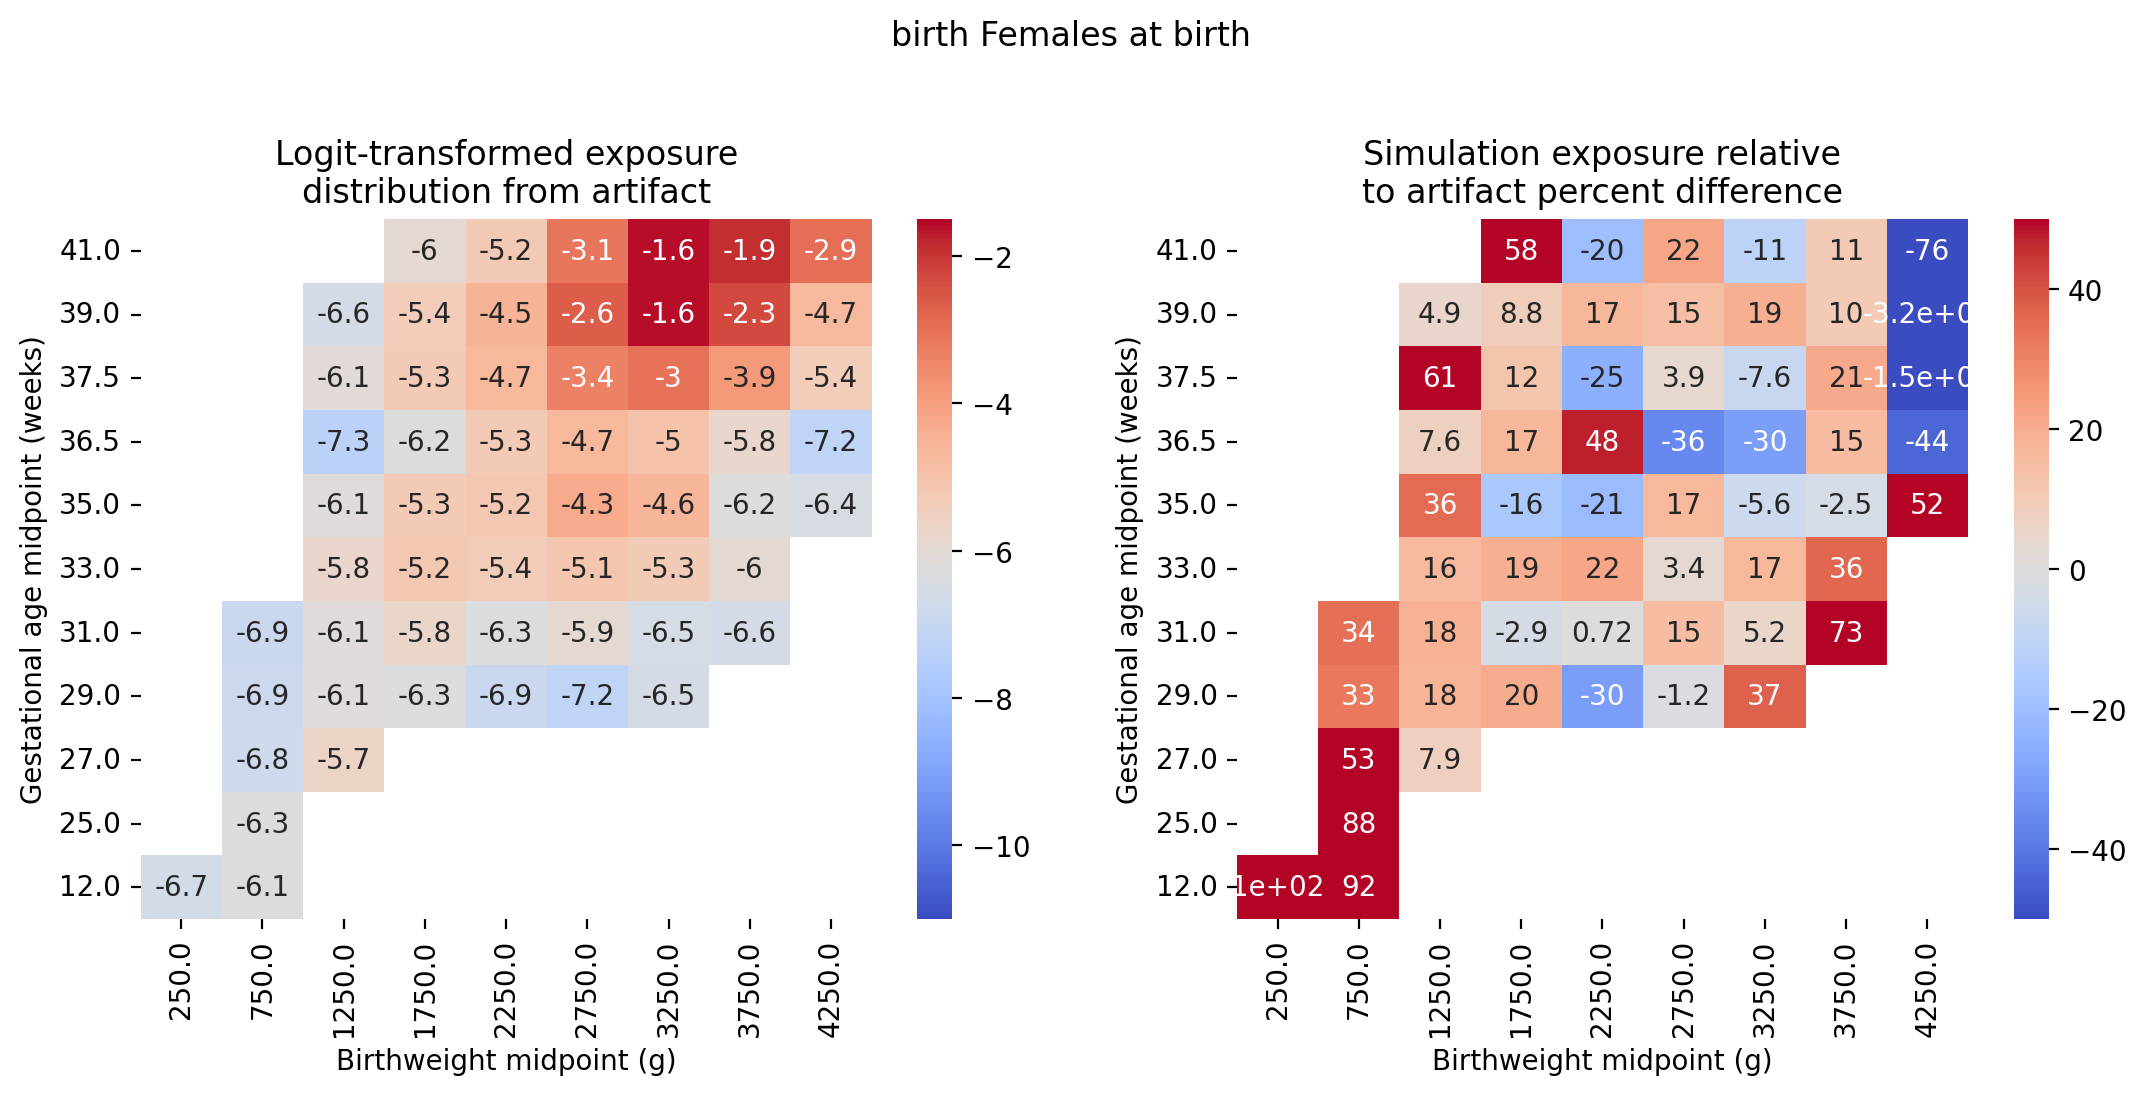

In [78]:
plot_exposure_heat_map('Female', 'birth', births, 'at birth')

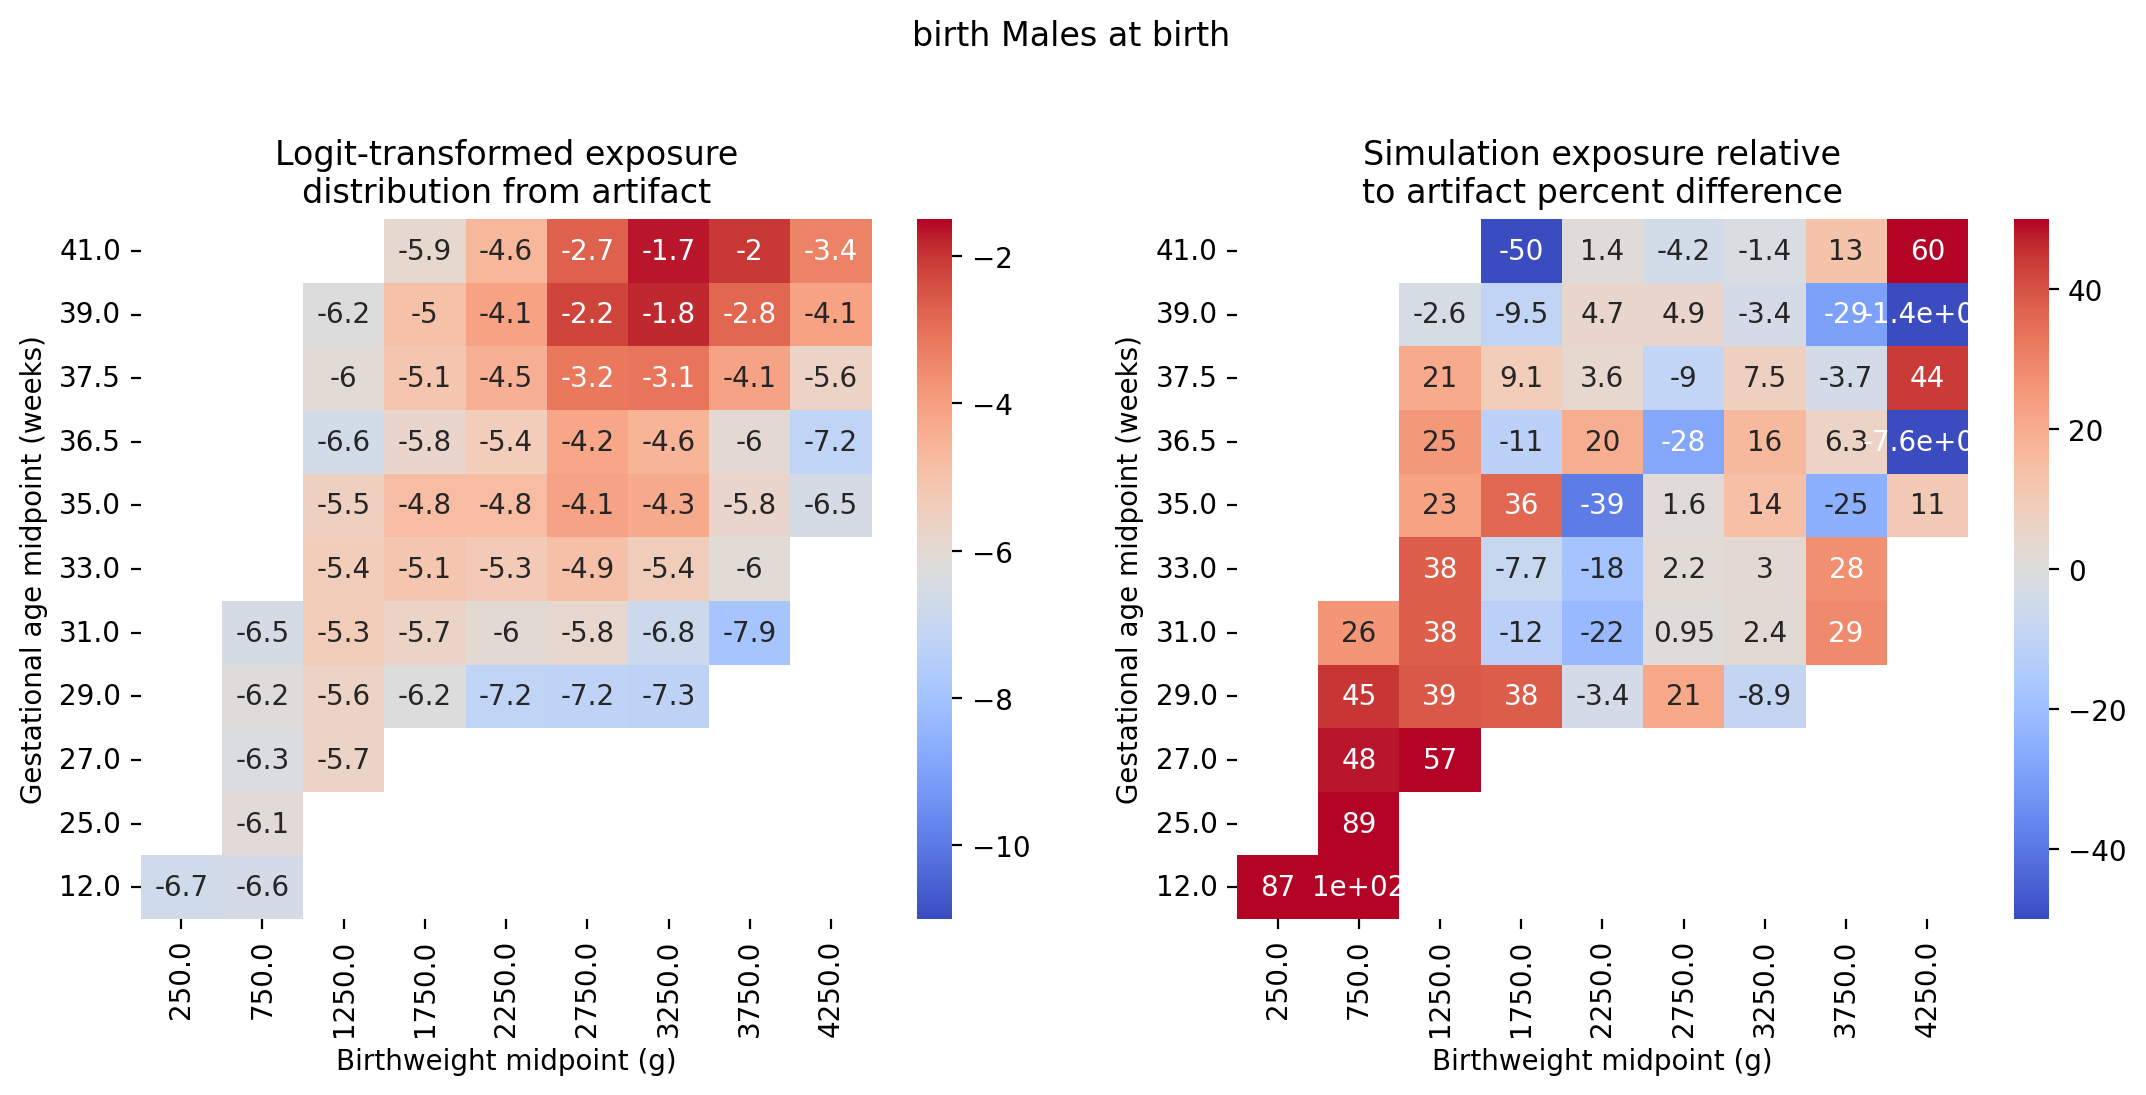

In [79]:
plot_exposure_heat_map('Male', 'birth', births, 'at birth')

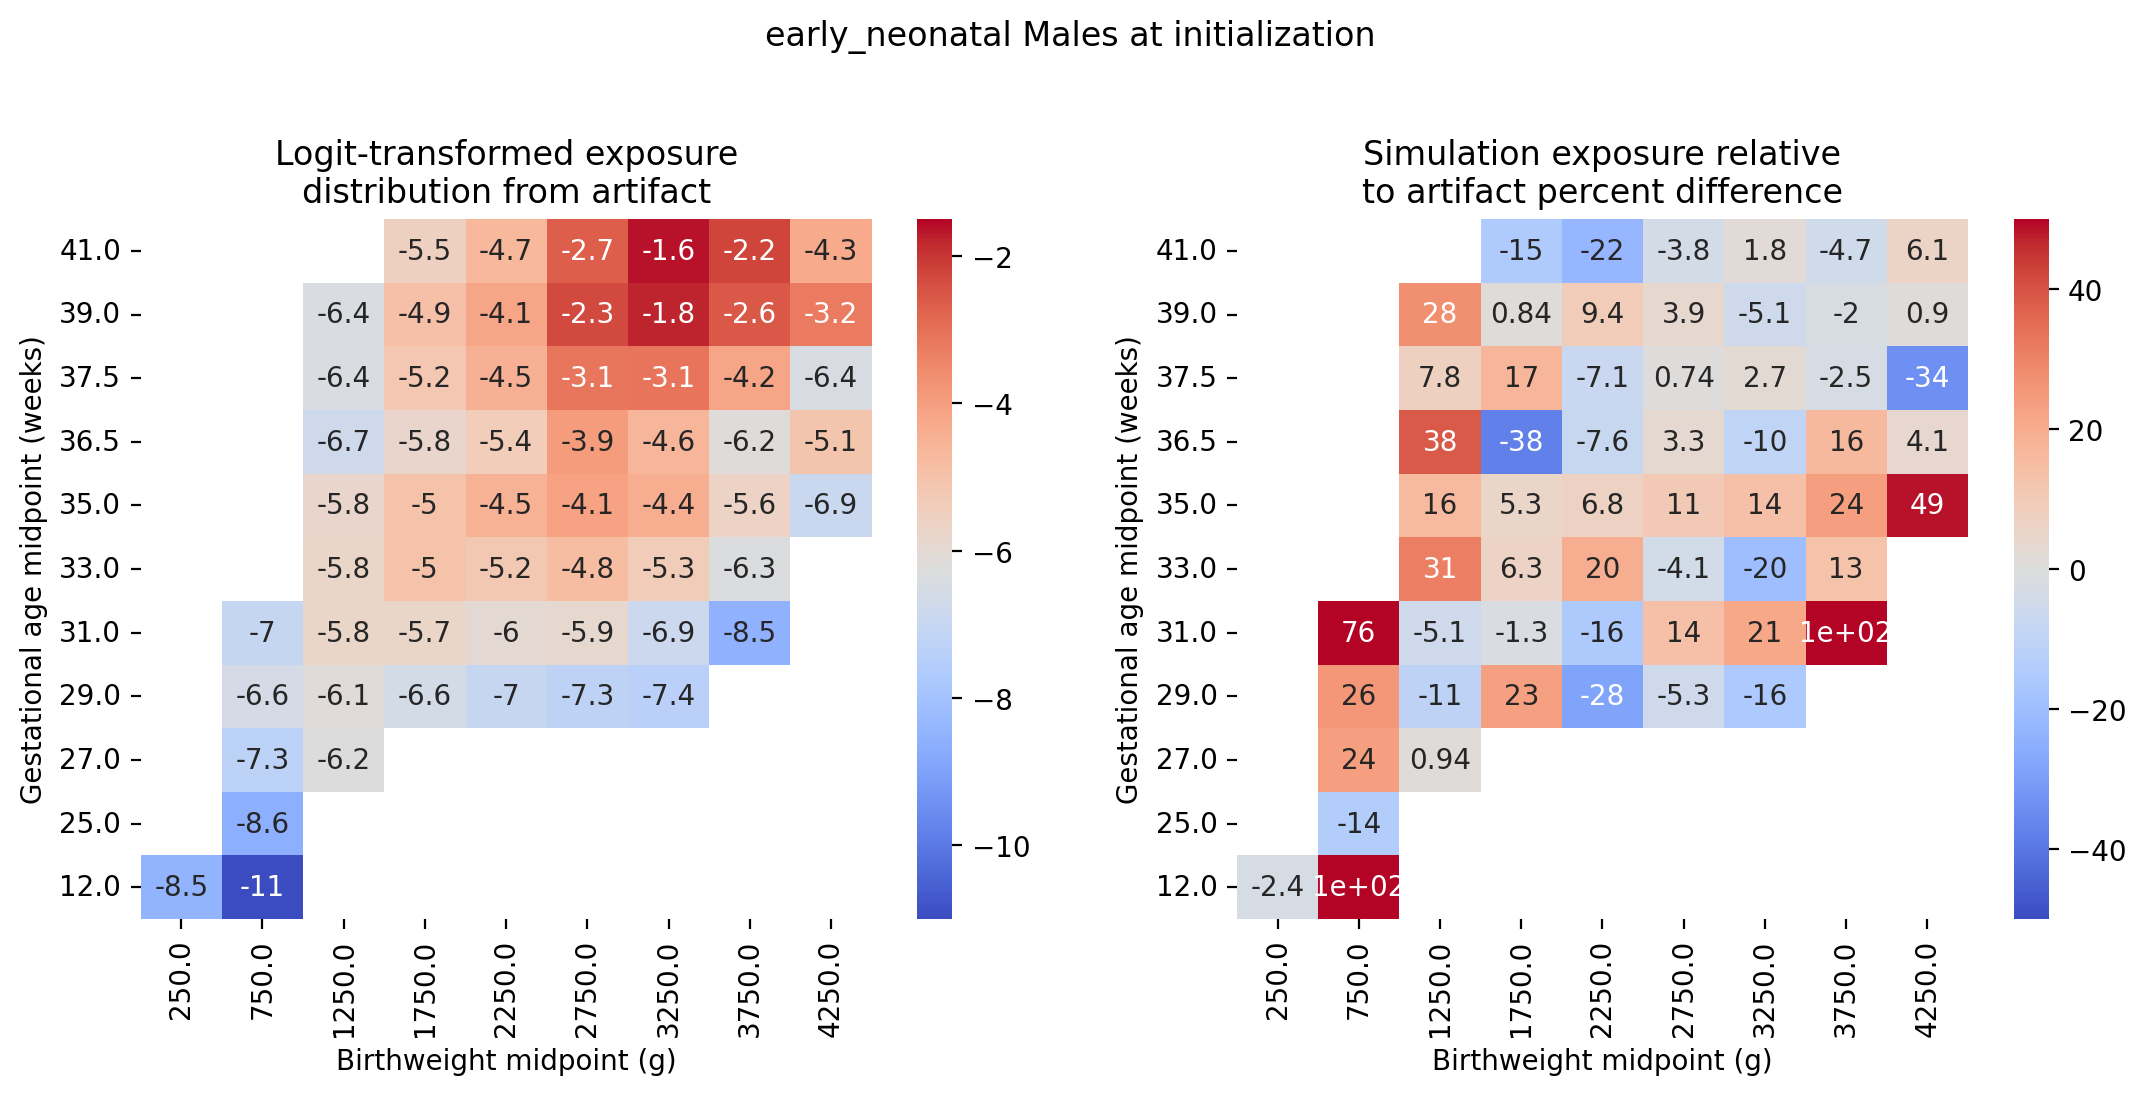

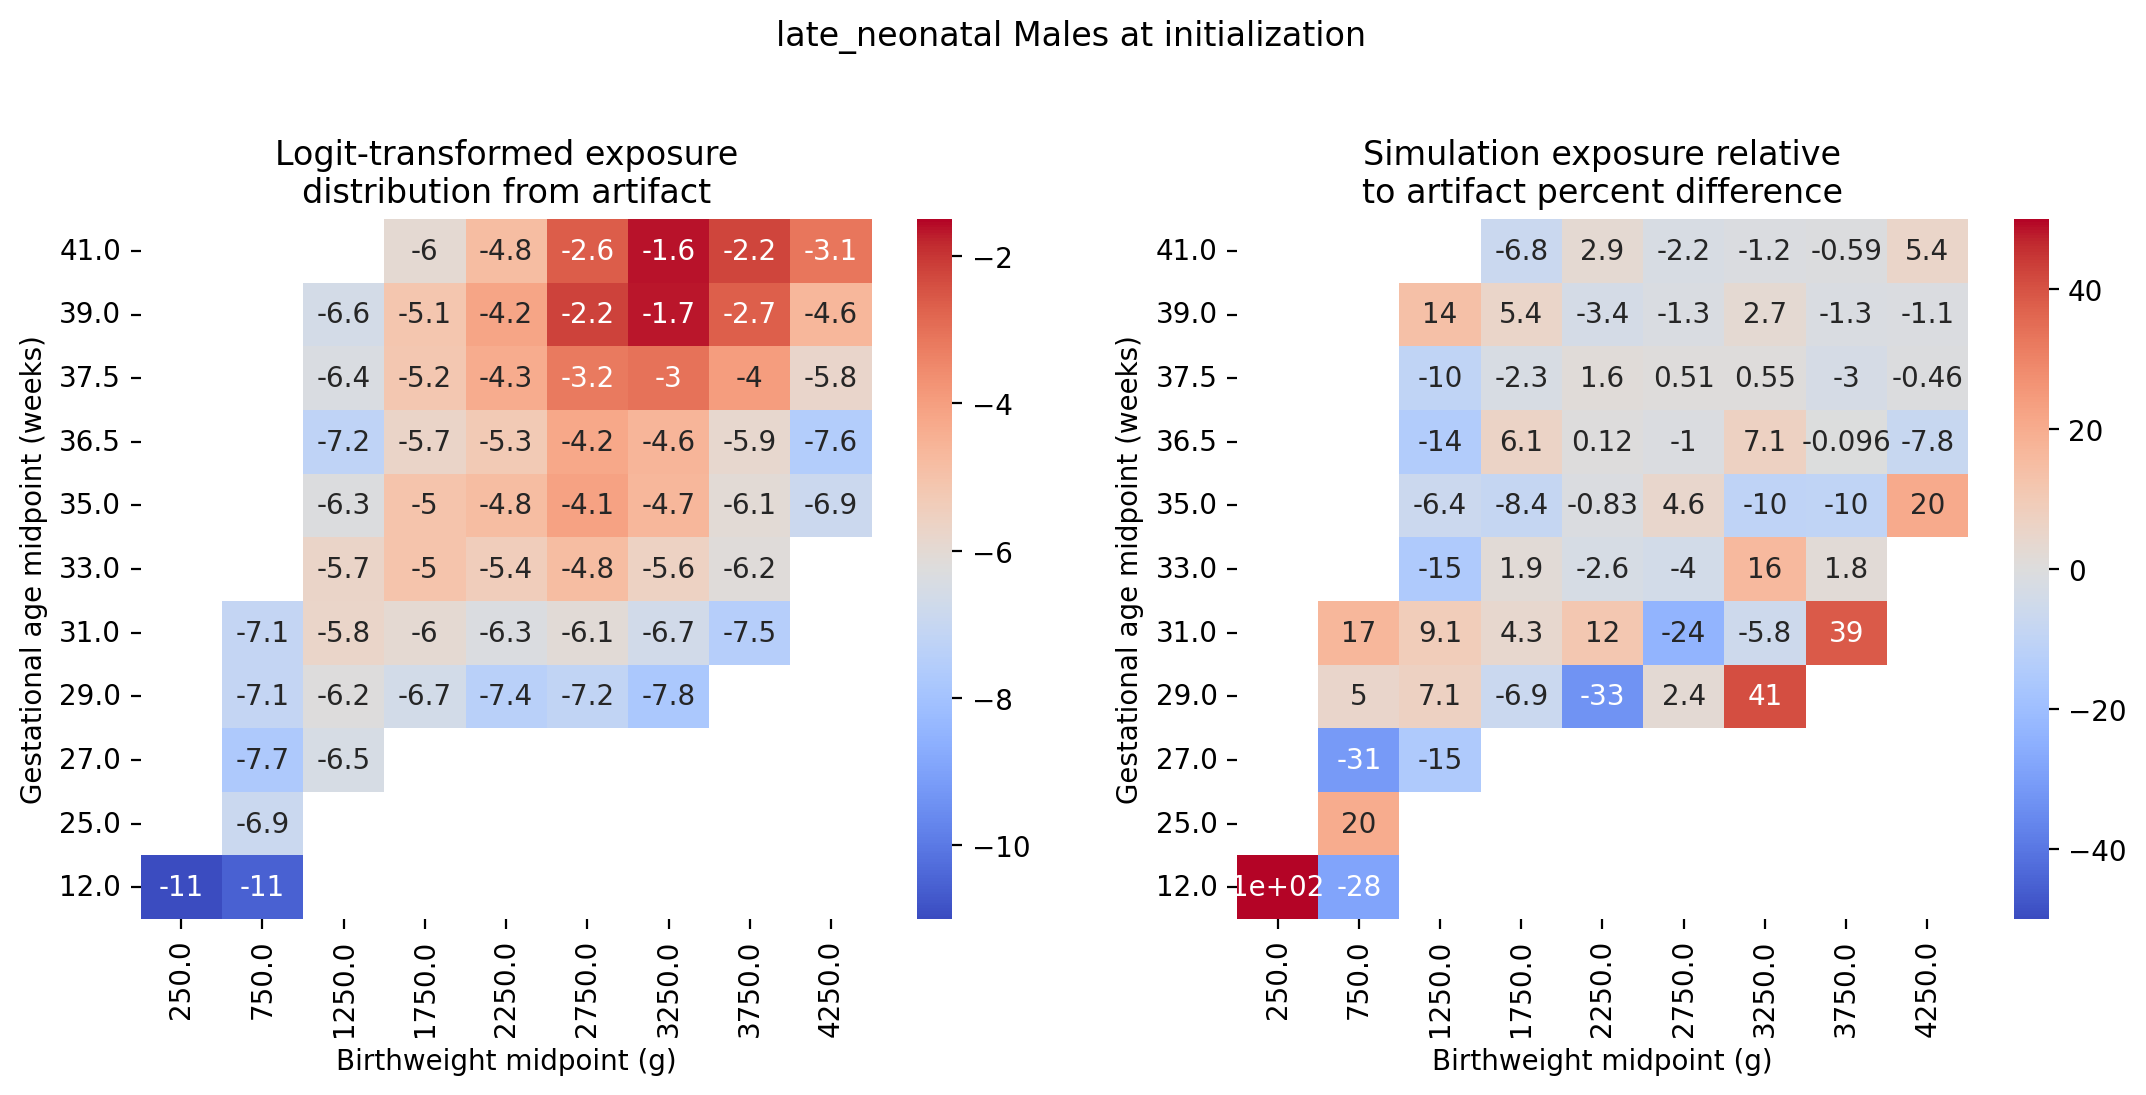

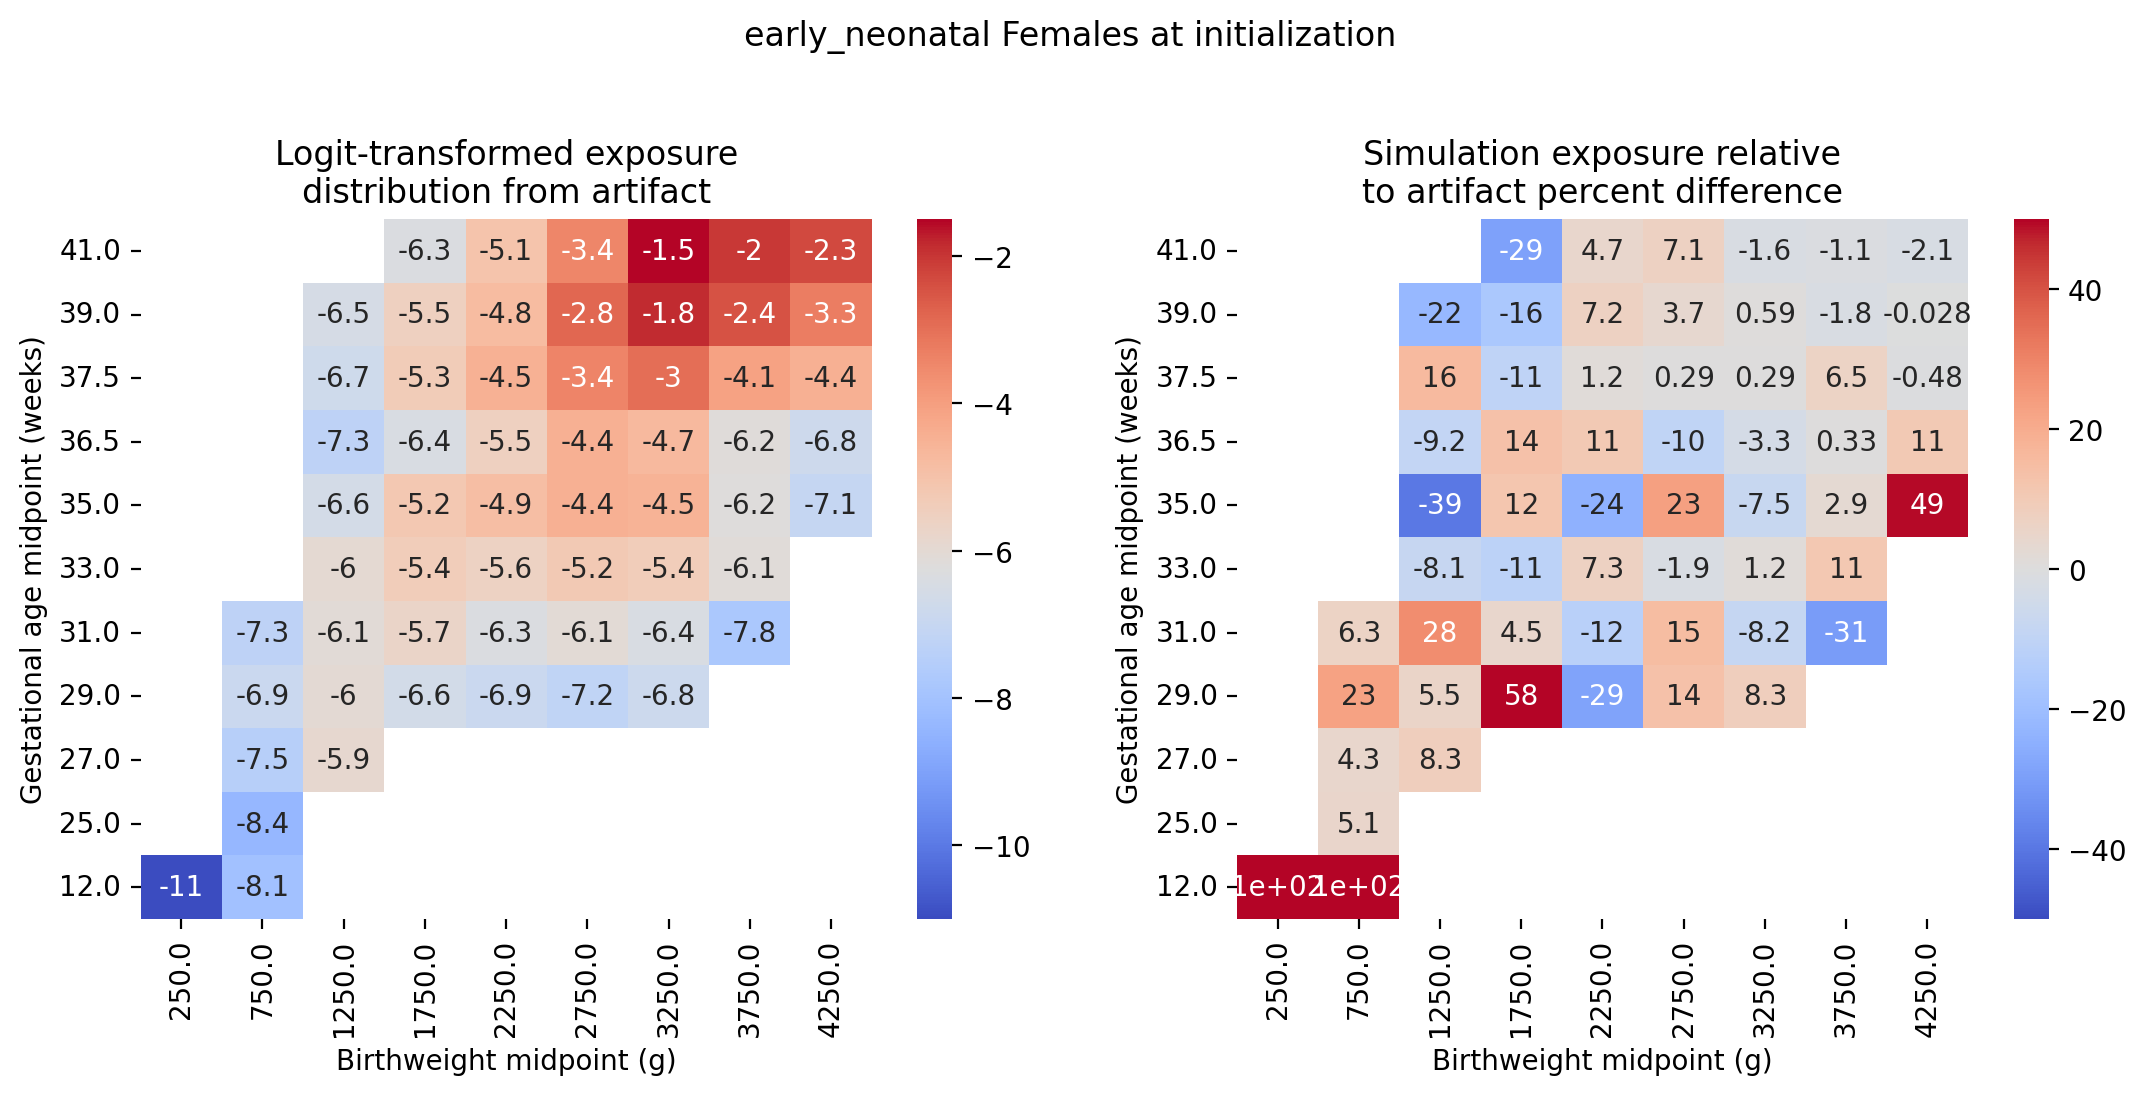

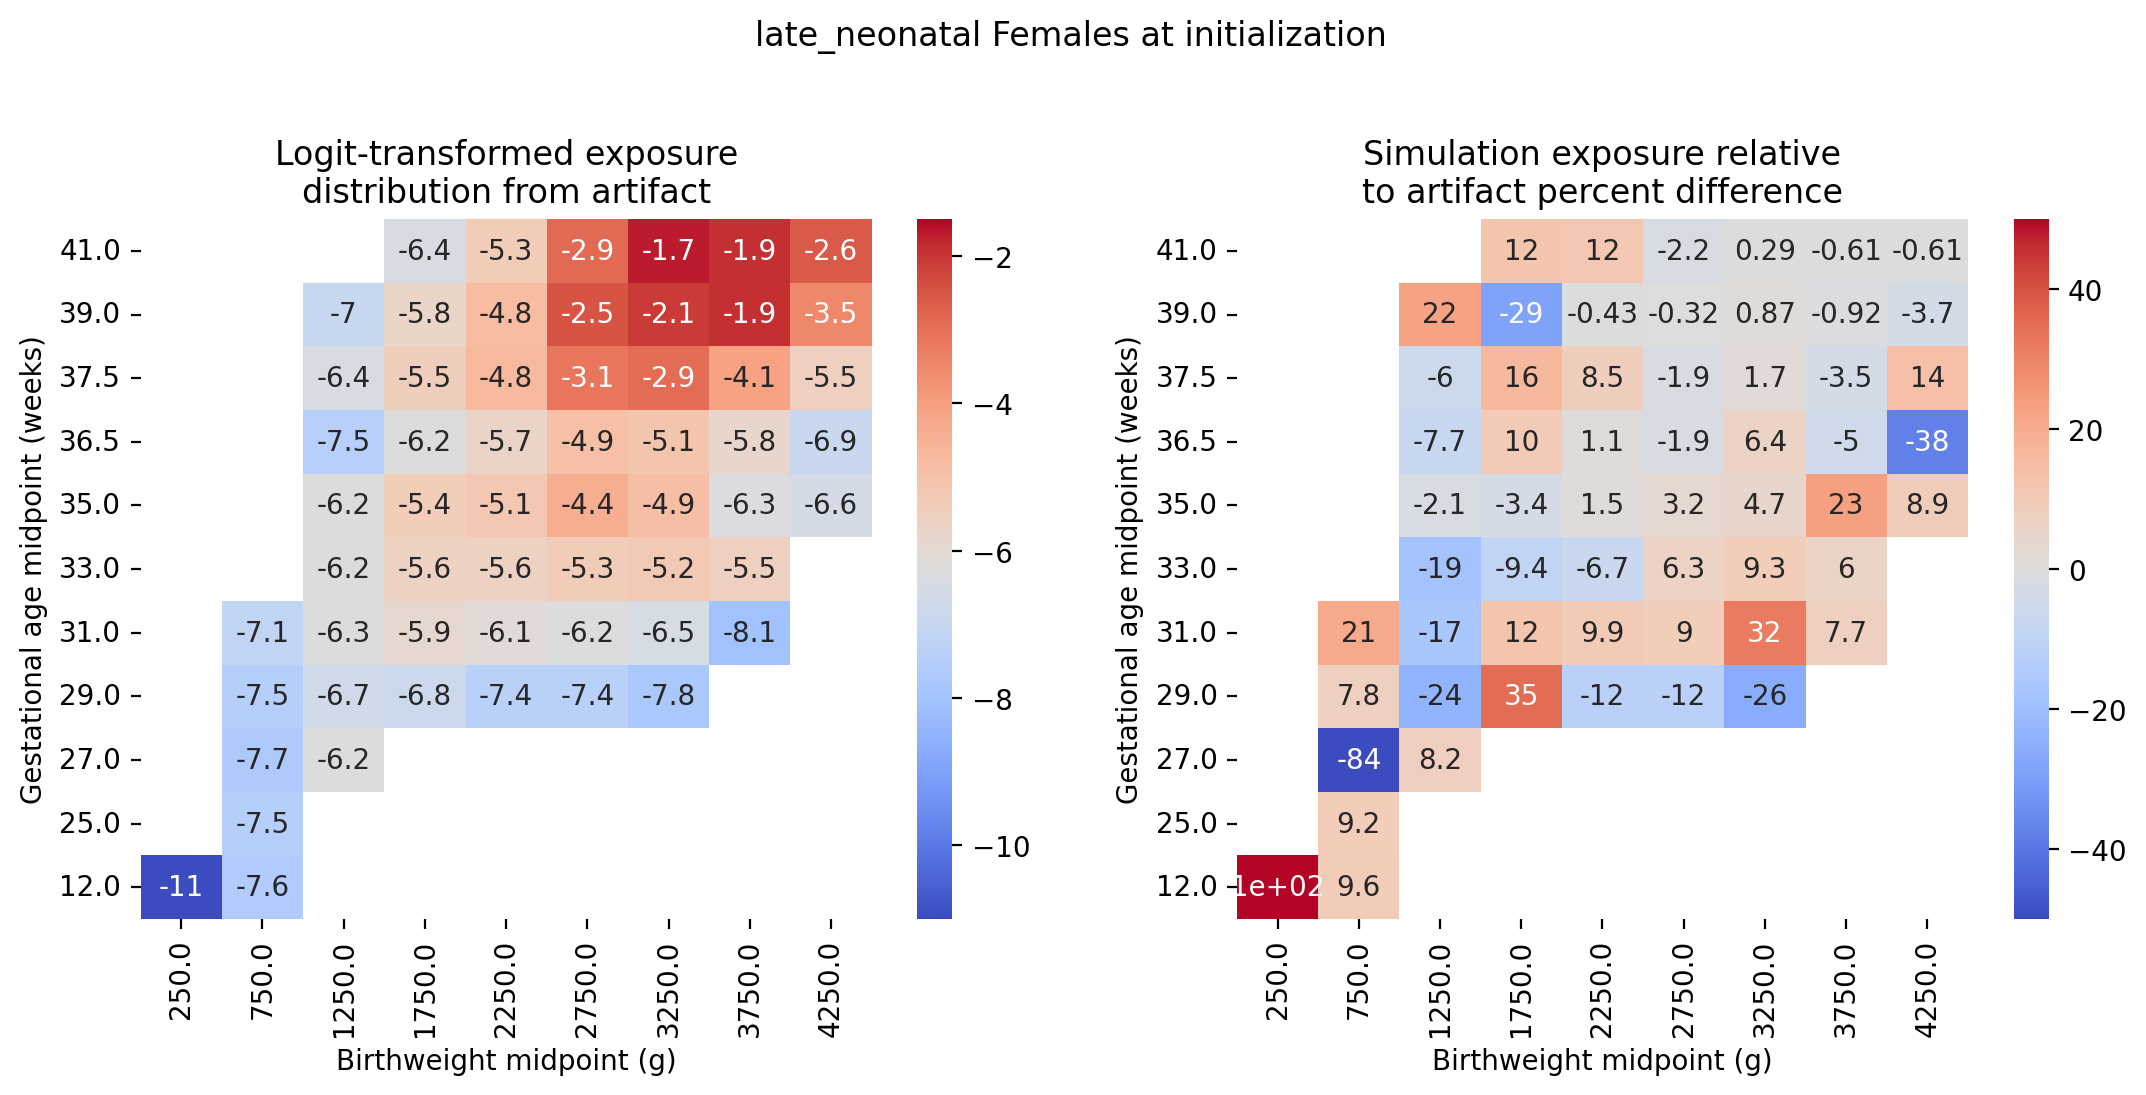

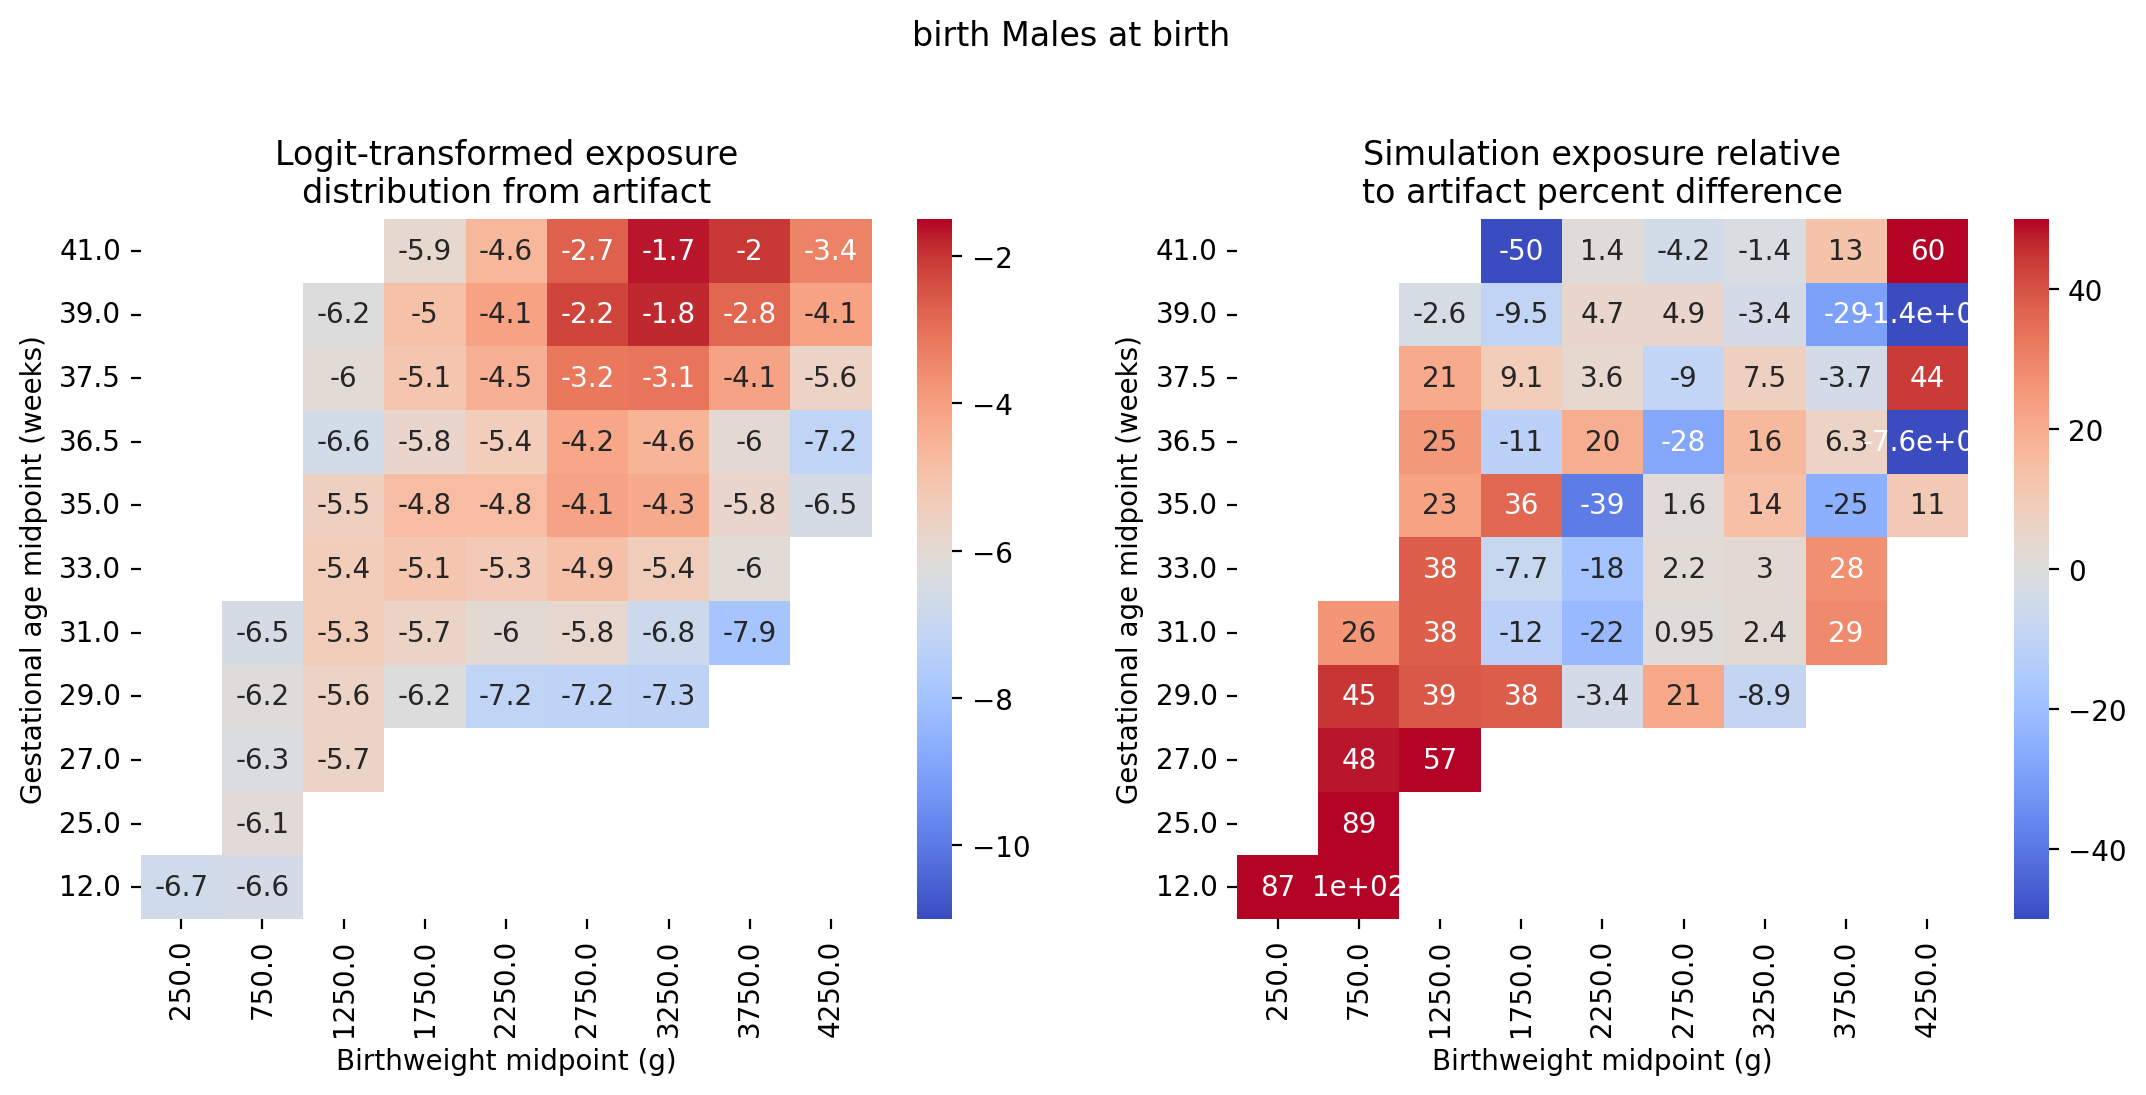

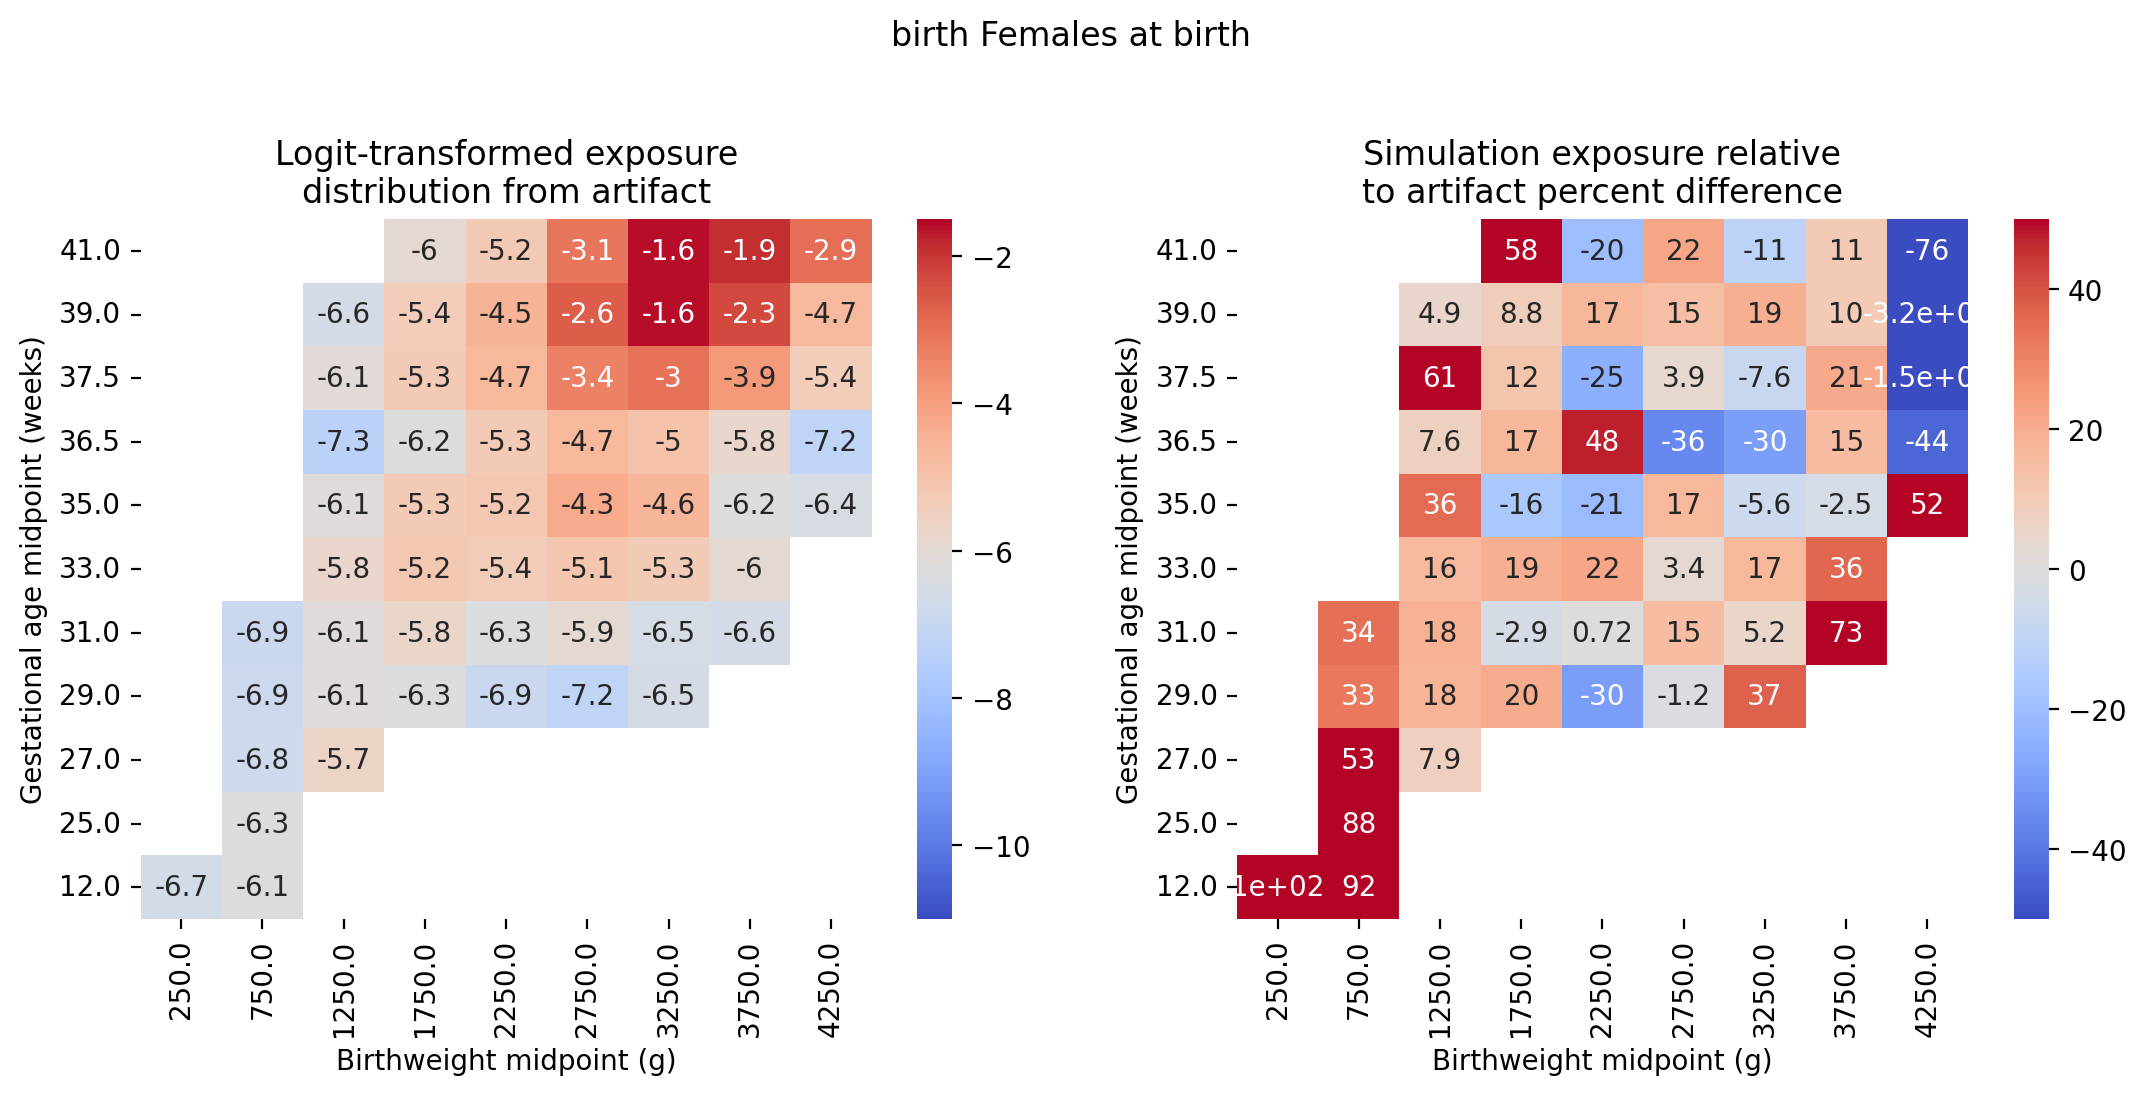

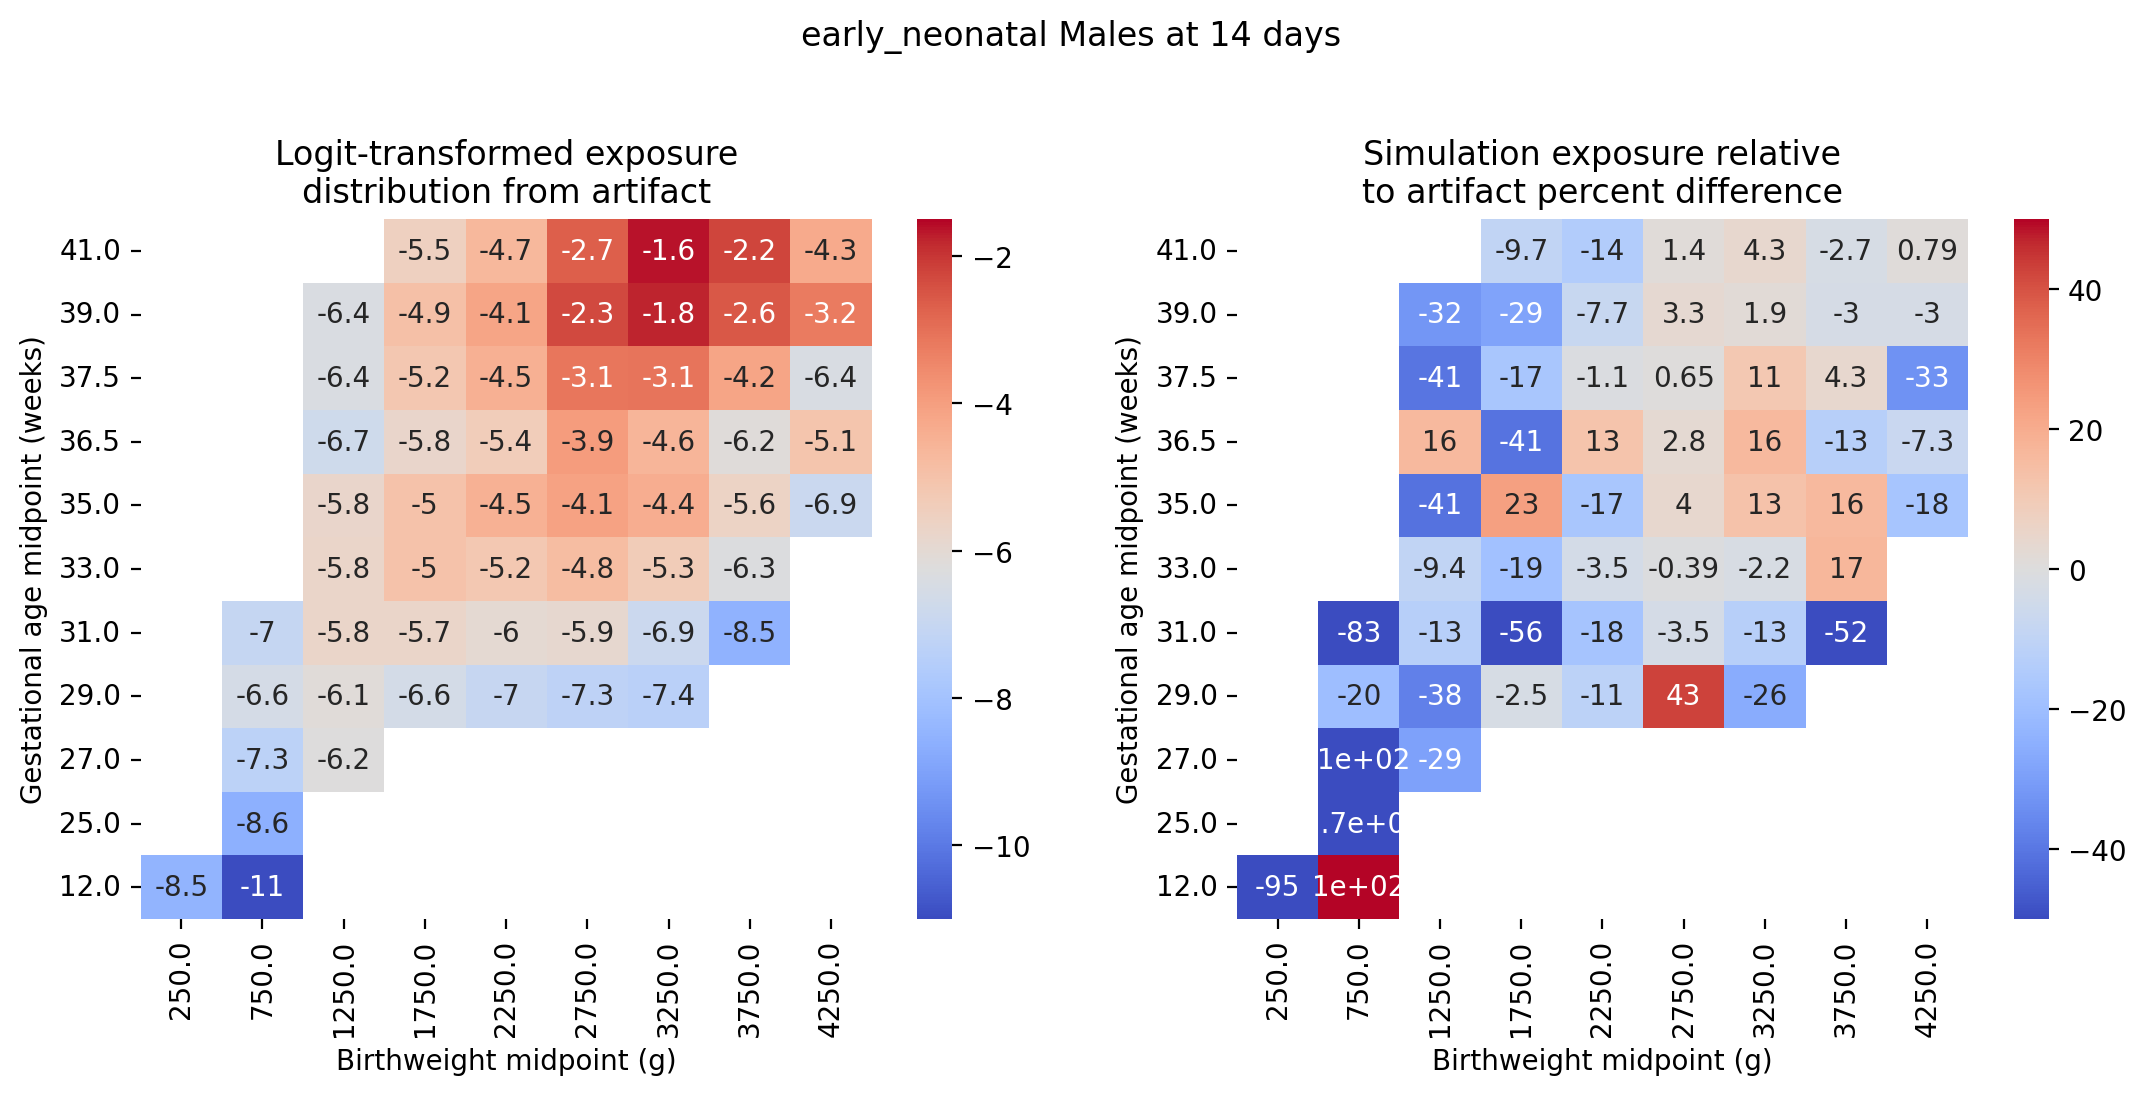

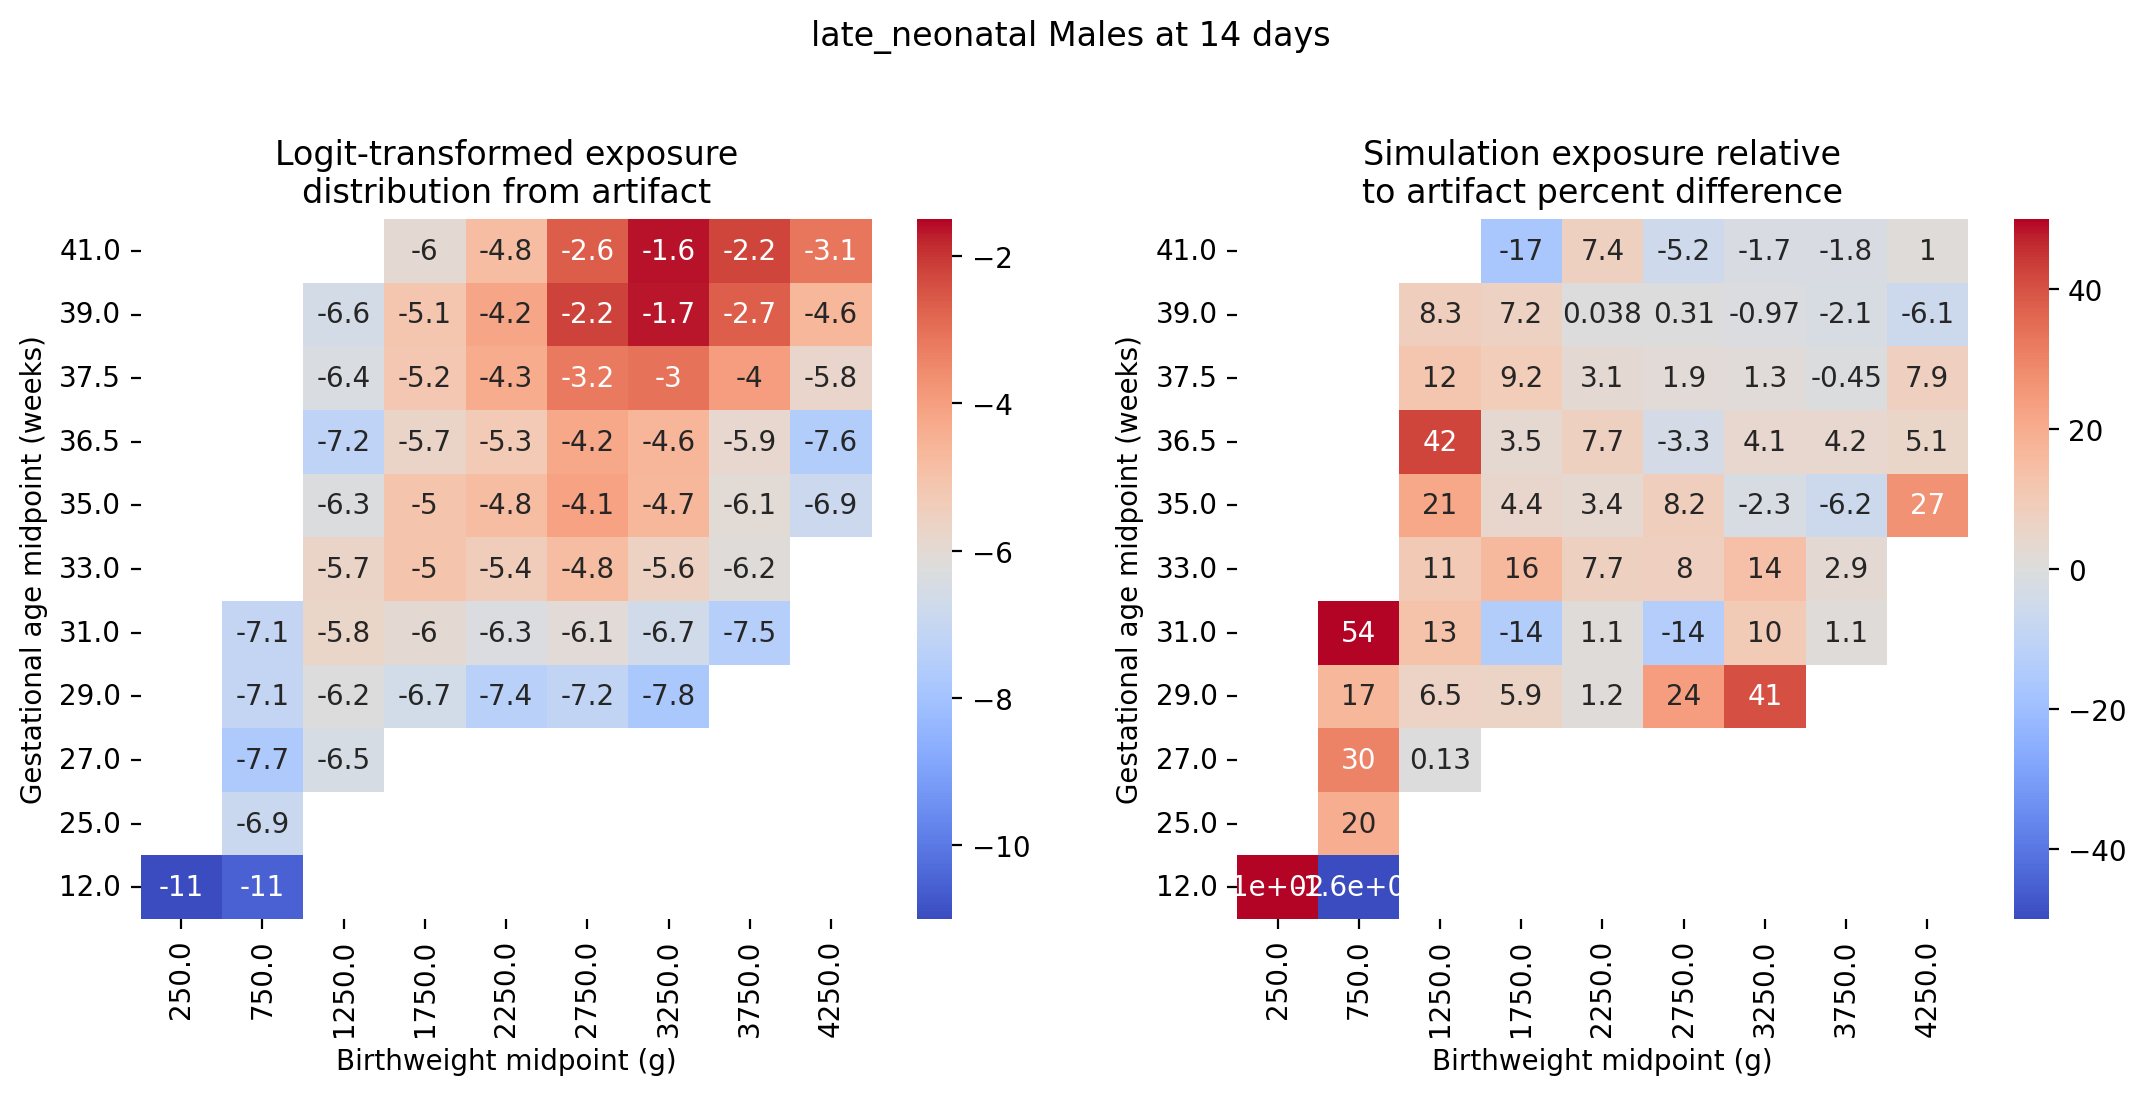

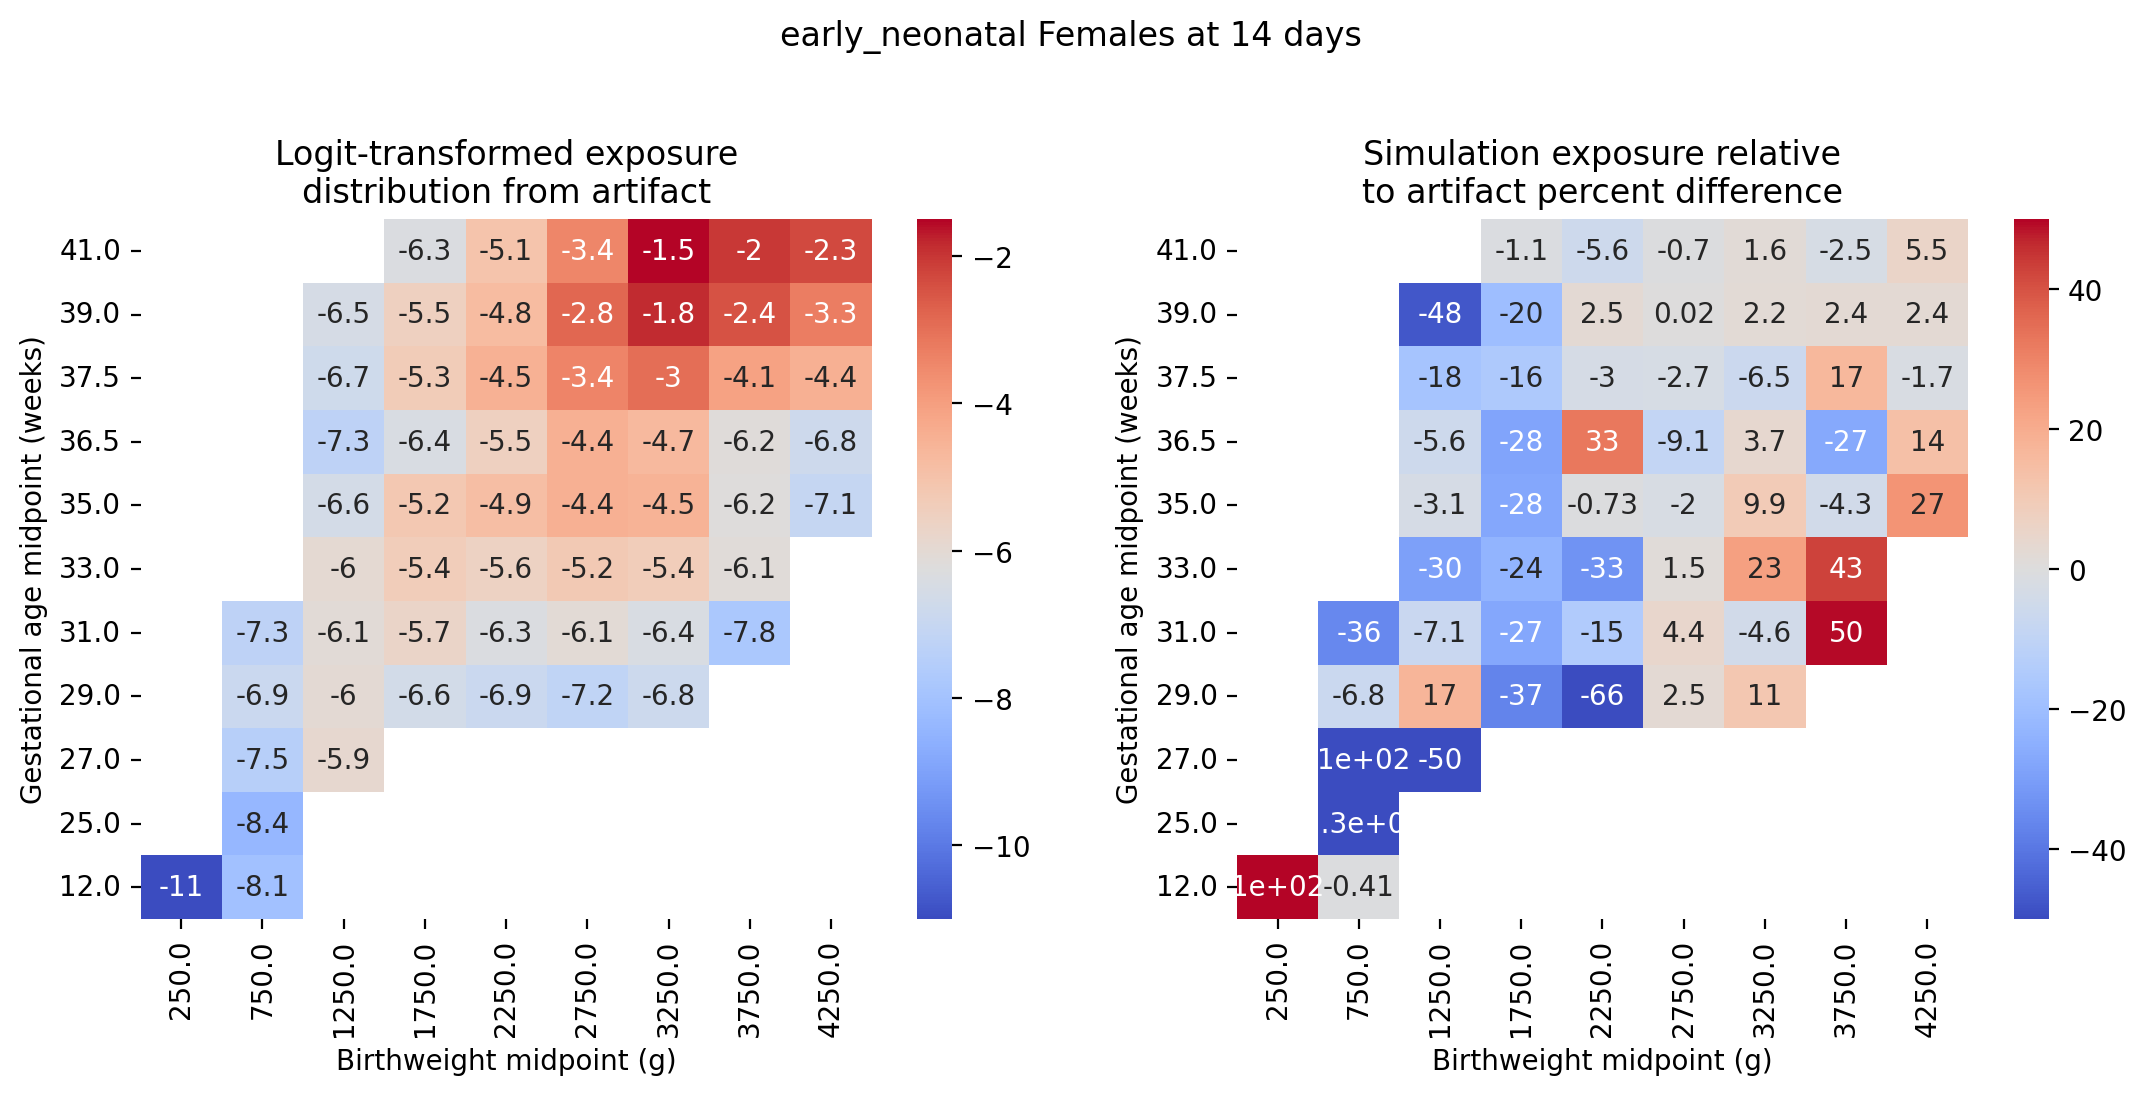

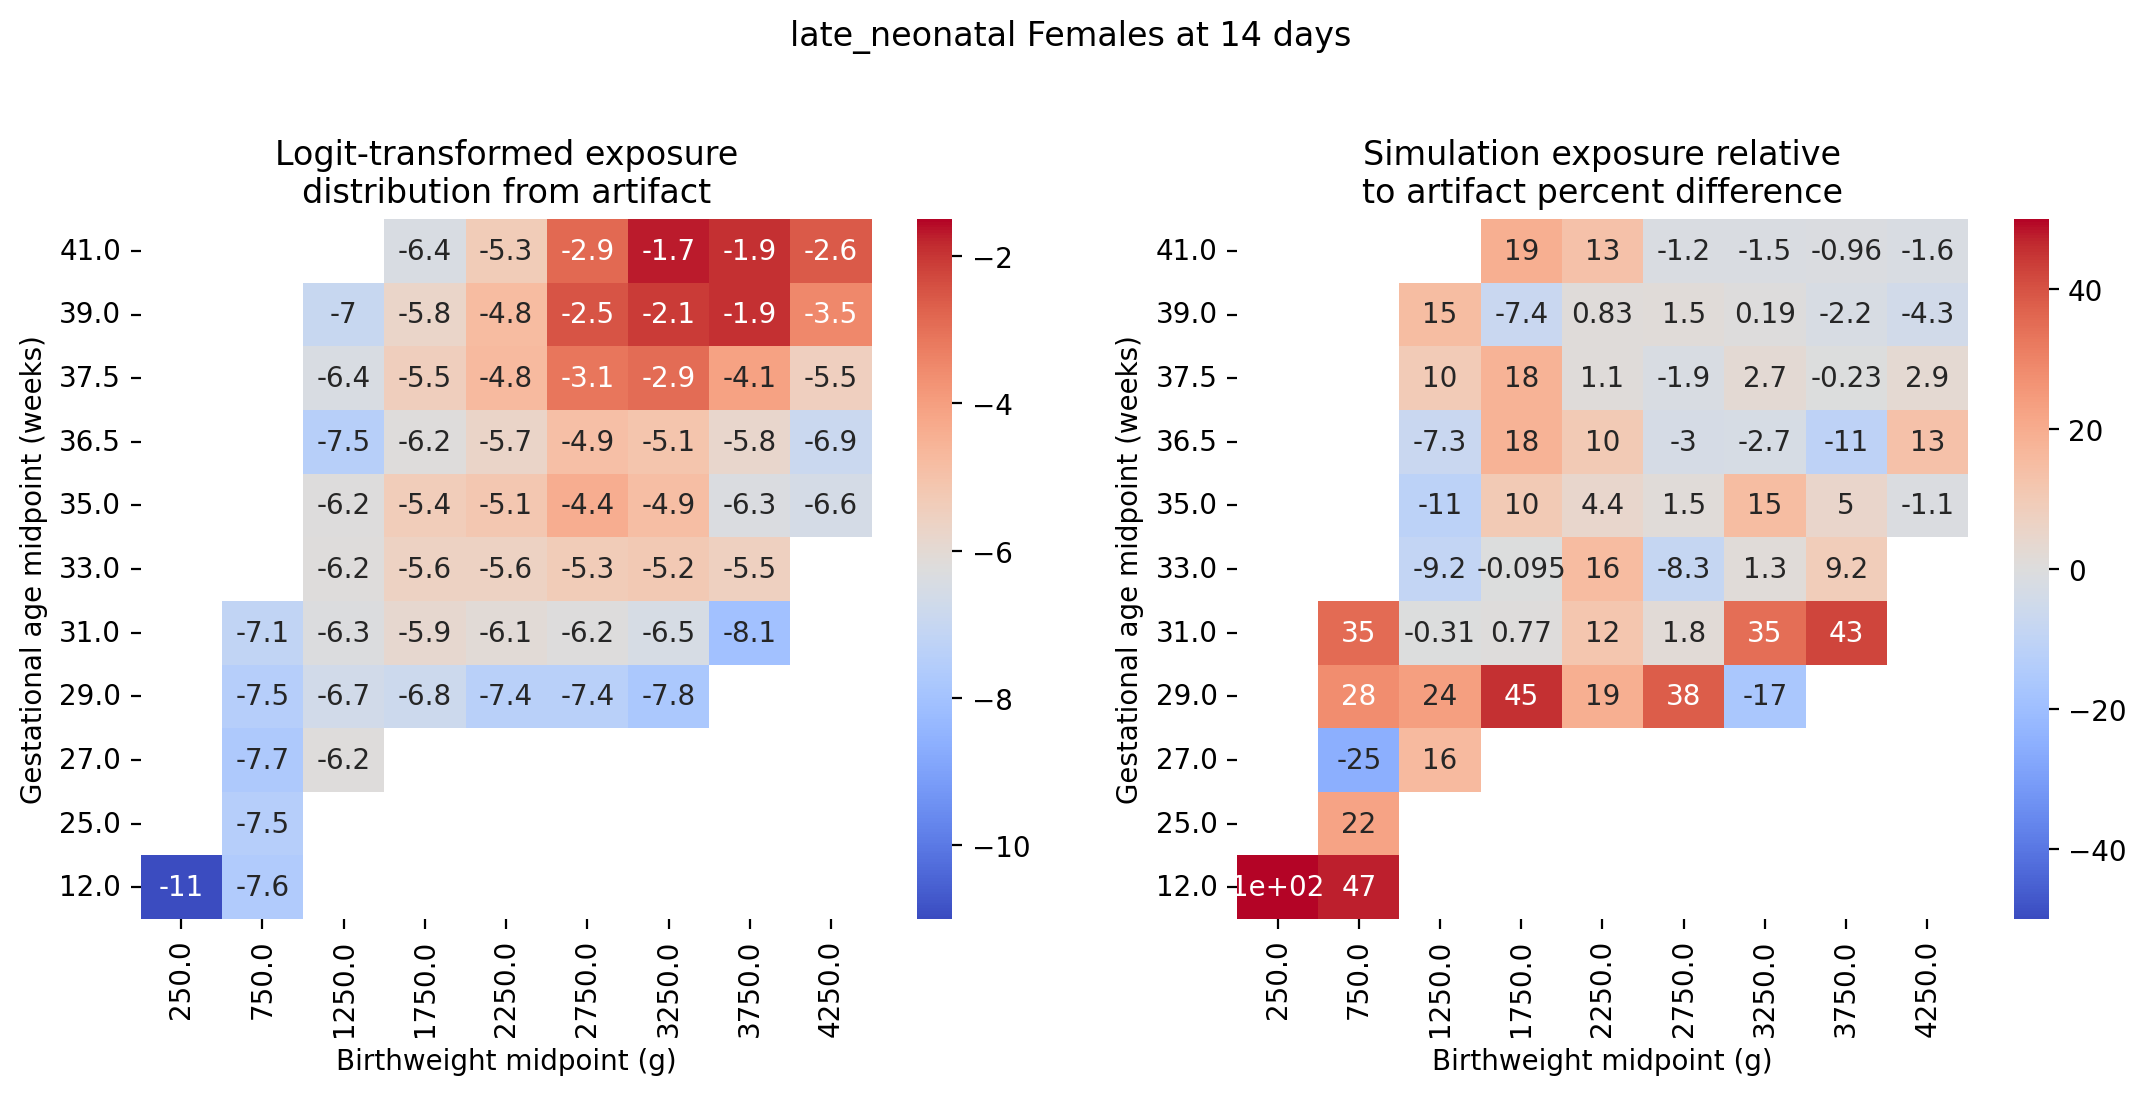

In [80]:
with PdfPages('model_5.1.1_lbwsg_exposure.pdf') as pdf:
#for sex in ['Male','Female']:
#    for age_group in ['early_neonatal','late_neonatal']:
#        for log in [True,False]:
#            bar_chart(sex, age_group, log=log)
#            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev, 'at initialization')
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['birth']:
            plot_exposure_heat_map(sex, age_group, births, 'at birth')
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev1, 'at 14 days')
            pdf.savefig(bbox_inches='tight')



Text(0.9, 1.25, 'early_neonatal Males')

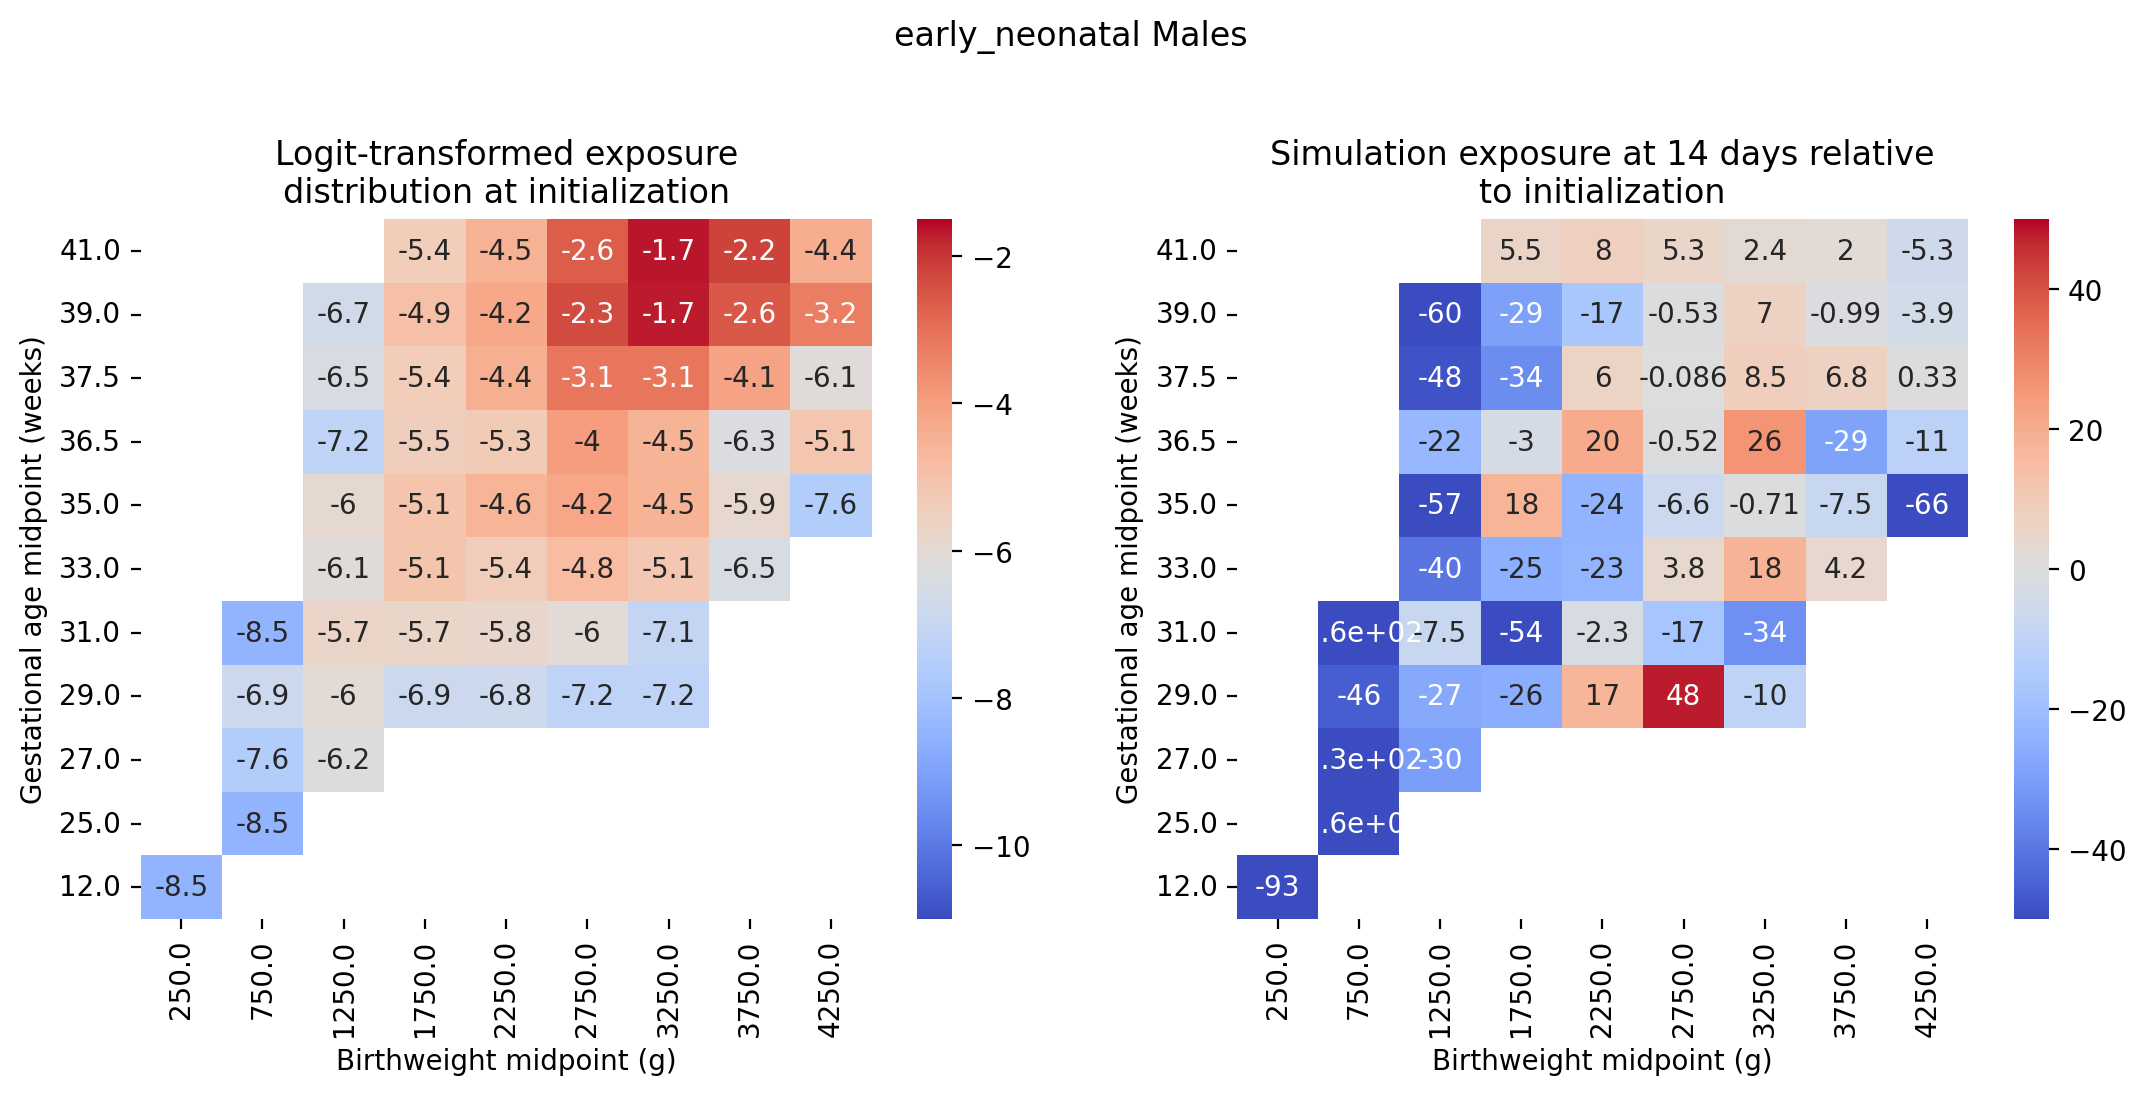

In [102]:
sex='Male'
age_group='early_neonatal'
p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
    .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
    .merge(prev1.loc[(prev1.sex==sex)&(prev1.age_group==age_group)], on=['parameter','ga_mid','bw_mid','sex','age_group'], suffixes=['_0','_14']))
p = p.replace(np.nan, 0)
p['diff'] = p.count_0 - p['count_14']
p['percent_diff'] = p['diff'] / p.draw_0 * 100

s = p.pivot_table(index='ga_mid', columns='bw_mid', values='count_0').sort_index(ascending=False)
s = s.replace(0,np.nan)
s = np.log(s/(1-s))
a = p.pivot_table(index='ga_mid', columns='bw_mid', values='percent_diff').sort_index(ascending=False)
a = a.replace(0,np.nan)
#a=np.log(a/(1-a))
fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
sns.heatmap(s, ax=ax1,annot=True,cmap="coolwarm",vmin=-11,vmax=-1.5)
sns.heatmap(a, ax=ax2,annot=True,cmap="coolwarm",vmin=-50,vmax=50)
ax1.set_title('Logit-transformed exposure\ndistribution at initialization')
ax2.set_title('Simulation exposure at 14 days relative\nto initialization')
for ax in [ax1,ax2]:
    ax.set_xlabel('Birthweight midpoint (g)')
    ax.set_ylabel('Gestational age midpoint (weeks)')
plt.subplots_adjust(right=1.8, top=1)    
plt.suptitle(f'{age_group} {sex}s',
            x=0.9, y=1.25)

Text(0.5, 1.0, 'Relative risks\nearly neonatal males')

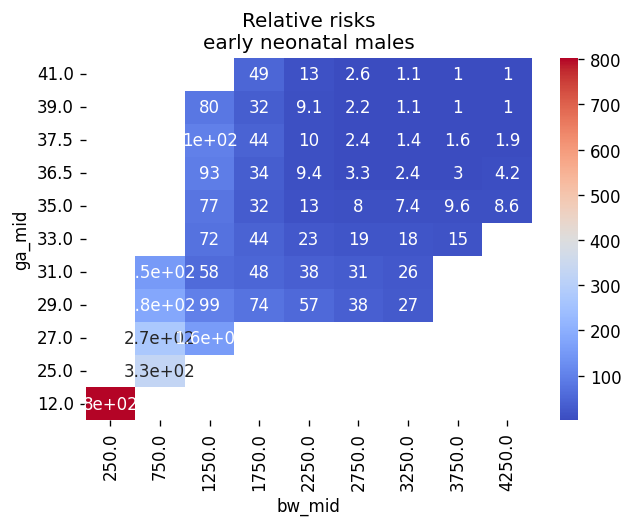

In [103]:
sex='Male'
age_group='early_neonatal'
prev = test
prev['parameter'] = prev['risk_factor.low_birth_weight_and_short_gestation_exposure']

p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
    .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
p = p.replace(np.nan, 0)
s = p.pivot_table(index='ga_mid', columns='bw_mid', values='relative_risk').sort_index(ascending=False)
s = s.replace(0,np.nan)
plt.figure(dpi=120)
sns.heatmap(s,annot=True,cmap="coolwarm")
plt.title('Relative risks\nearly neonatal males')